# Unsupervised Learning: Trade & Ahead by Meng Zhang

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/Project 7/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
# Check data shape
data.shape

(340, 15)

- There are 340 rows and 15 columns in the dataset.

In [7]:
# View a random sample of the dataset
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [8]:
# Create a copy of the dataset
df = data.copy()

In [9]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 4 object columns, which are ticker symbol, security, GICS sector, and GICS sub industry.
- There are 11 numerical columns, with 7 columns in the float type and 4 columns in the integer type.
- There are no null values in the data.

In [10]:
# Check the statistics of the dataset
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

- In the dataset, the ticker symbol and security are all unique values.
- There are 11 GICS sectors with the highest occurrence of 53. There are also 104 GICS sub industry, with the highest occurrence of 16.
- The rest columns all have unique values. The data magnitude varies largely among all the rest columns. Standardized preprocessing is needed for the dataset.

In [11]:
# Check missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- No missing values are found in the data.

In [12]:
# Check duplicated values
df.duplicated().sum()

0

- No duplicated values are found in the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Univariate Analysis

In [13]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

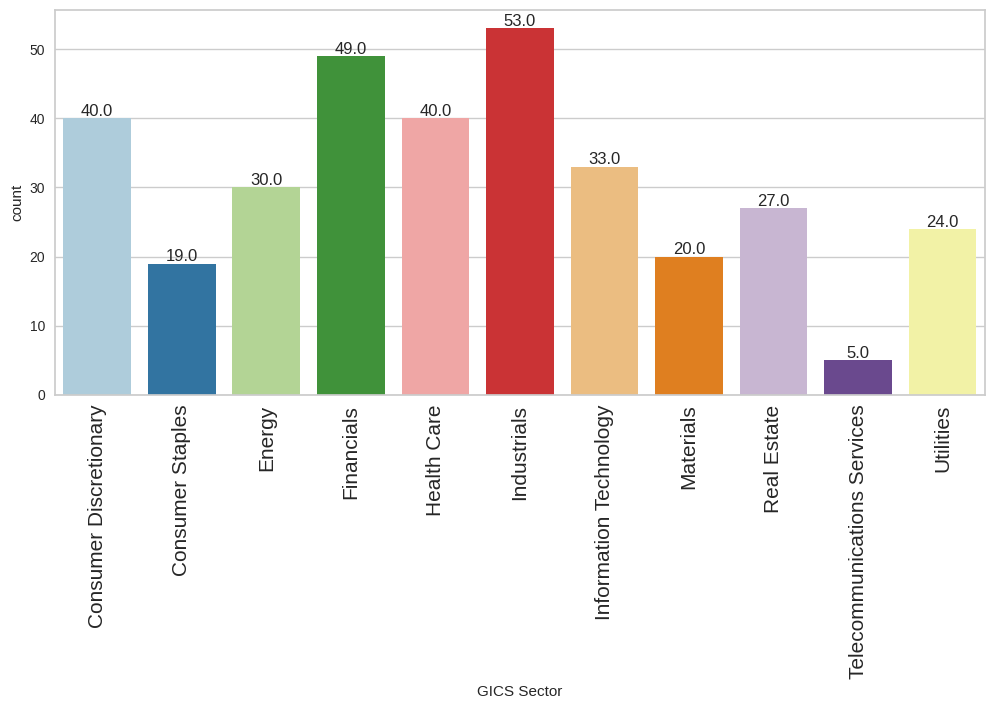

In [14]:
# Plot categorical columns
labeled_barplot(df, 'GICS Sector')

- Among all GICS sectors, industrials has the most data (53), financials has the second most data (49), while consumer discretionary and health care rank the third in terms of the data amount (40).
- Telecommunications services has the least data occurrences (5).

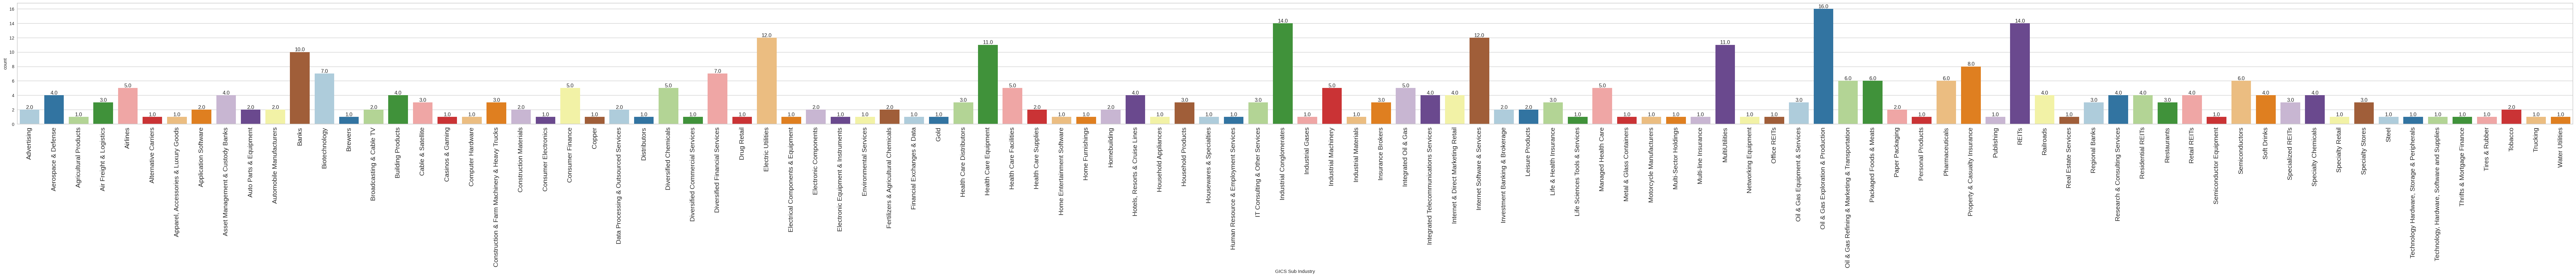

In [15]:
labeled_barplot(df, 'GICS Sub Industry')

- Among all the GICS sub industries, oil and gas exploration and production category has the most data amount (16). Industrial conglomerates and REITs rank the second in data amount (14).
- Many GICS sub industry categories have only one data count.

In [16]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

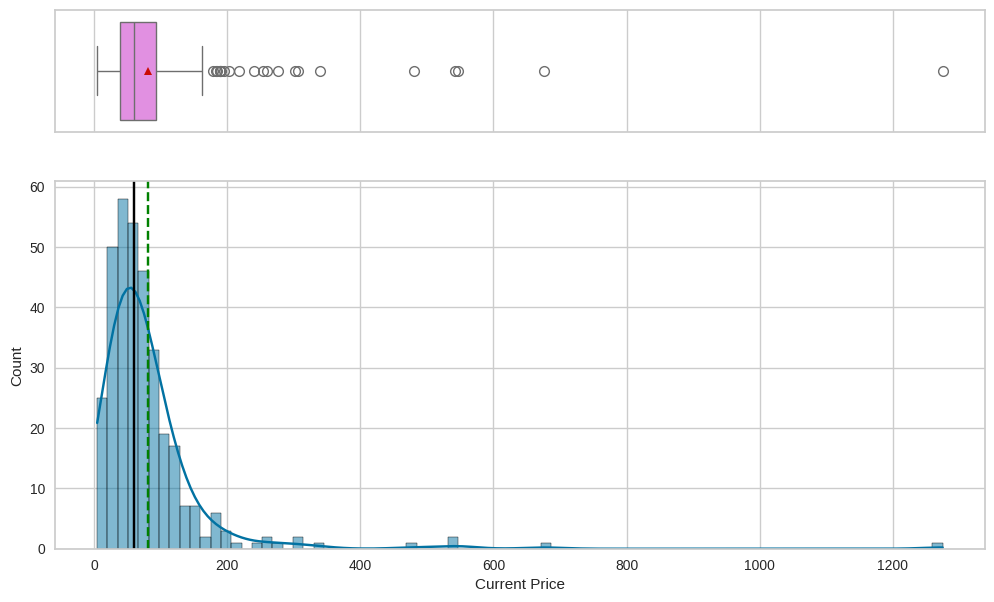

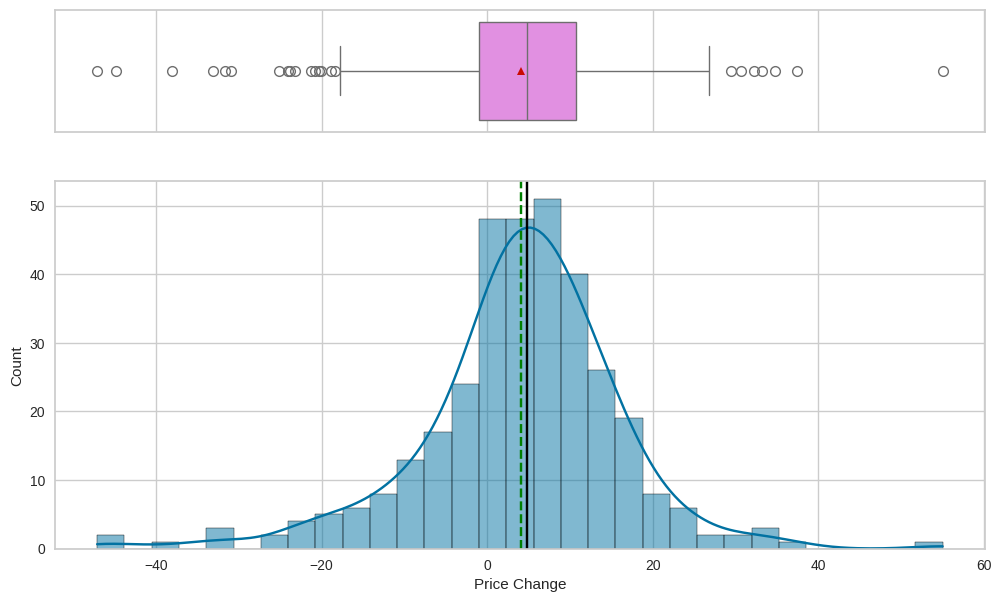

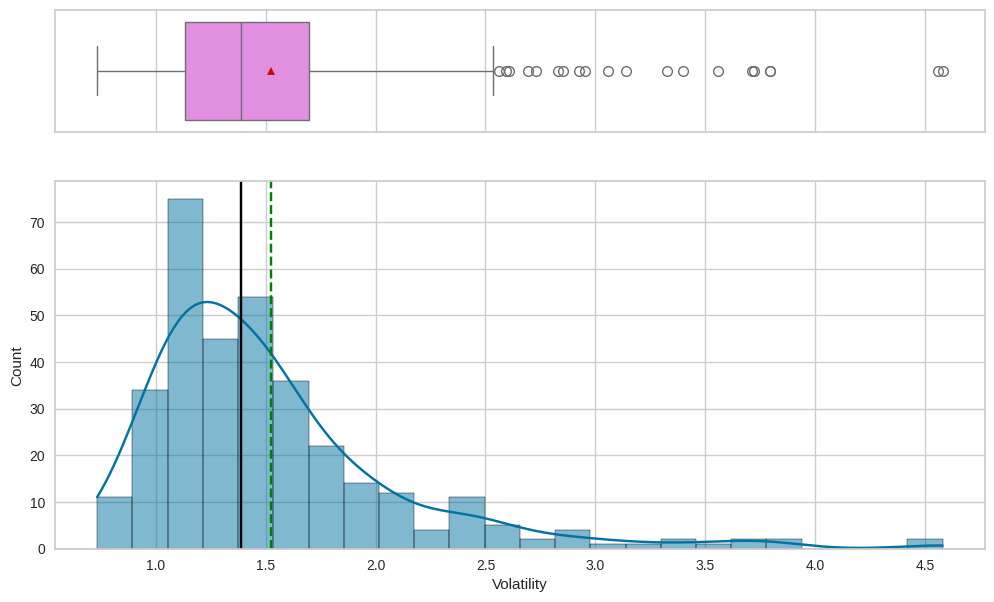

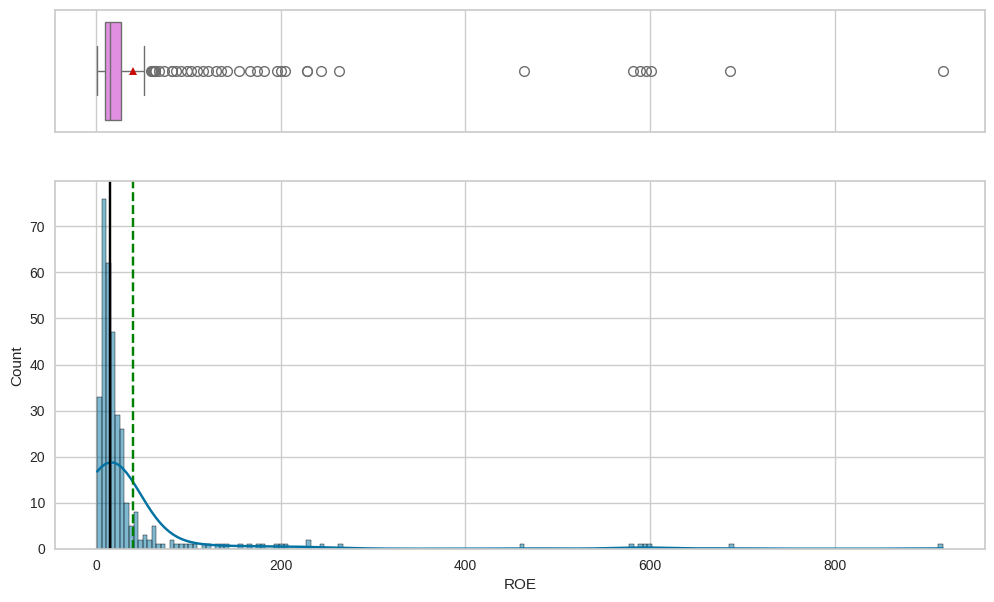

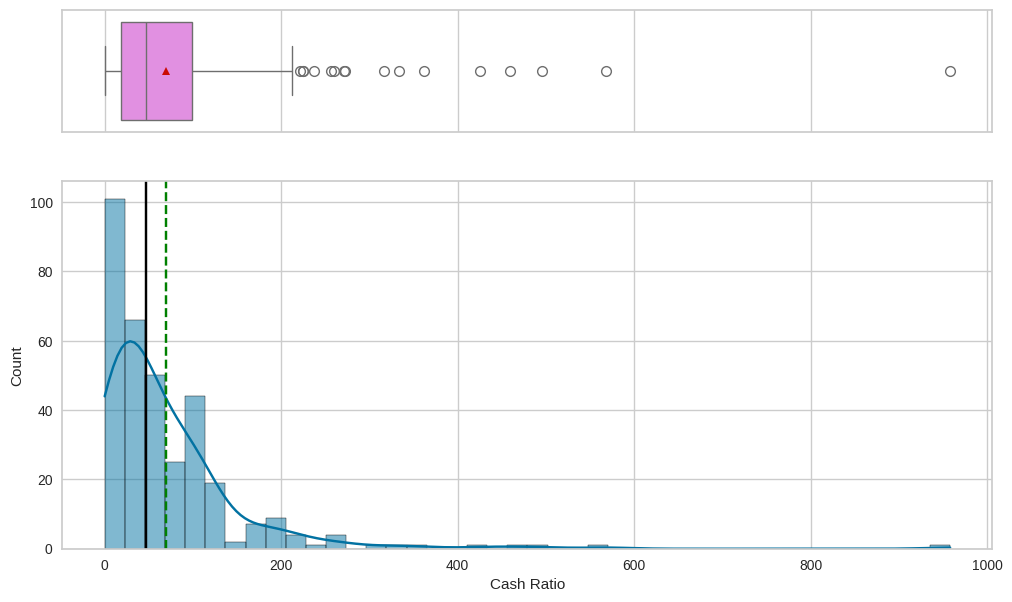

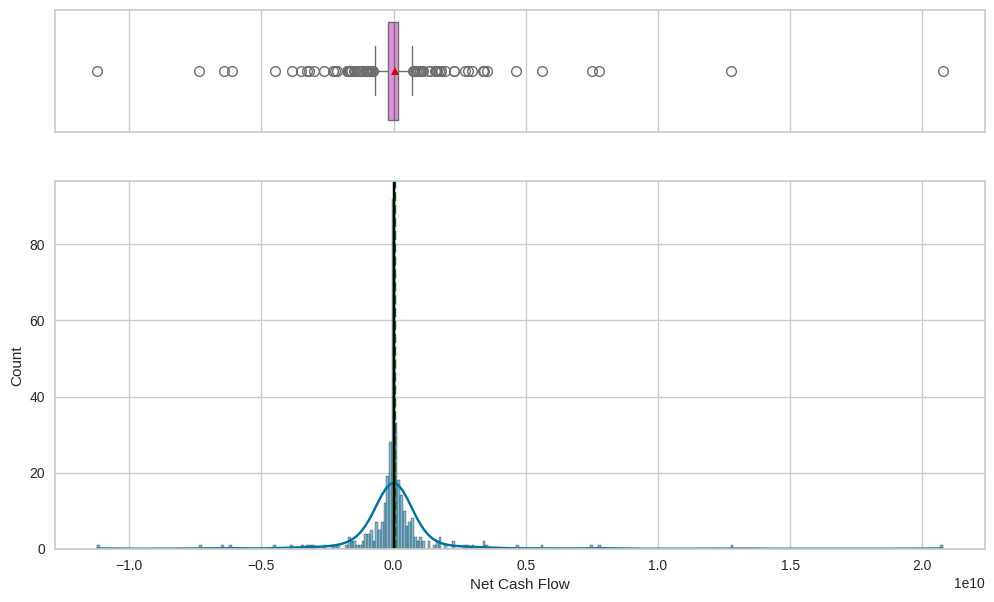

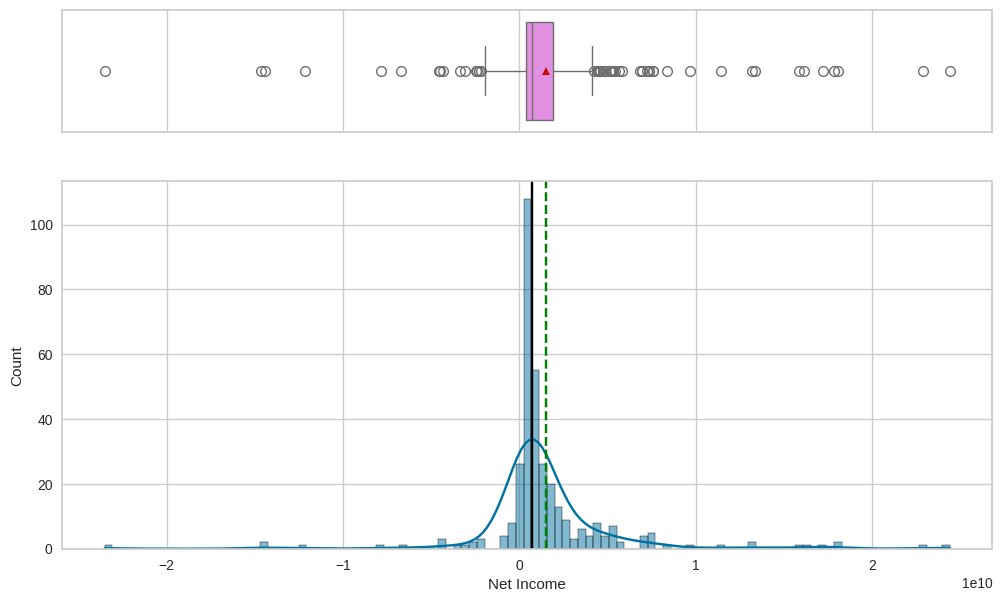

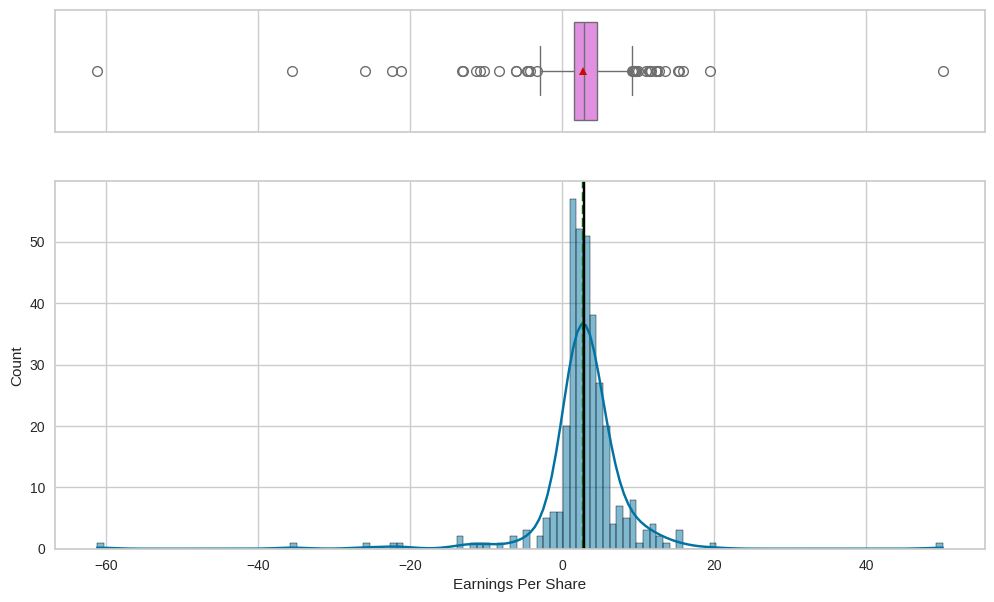

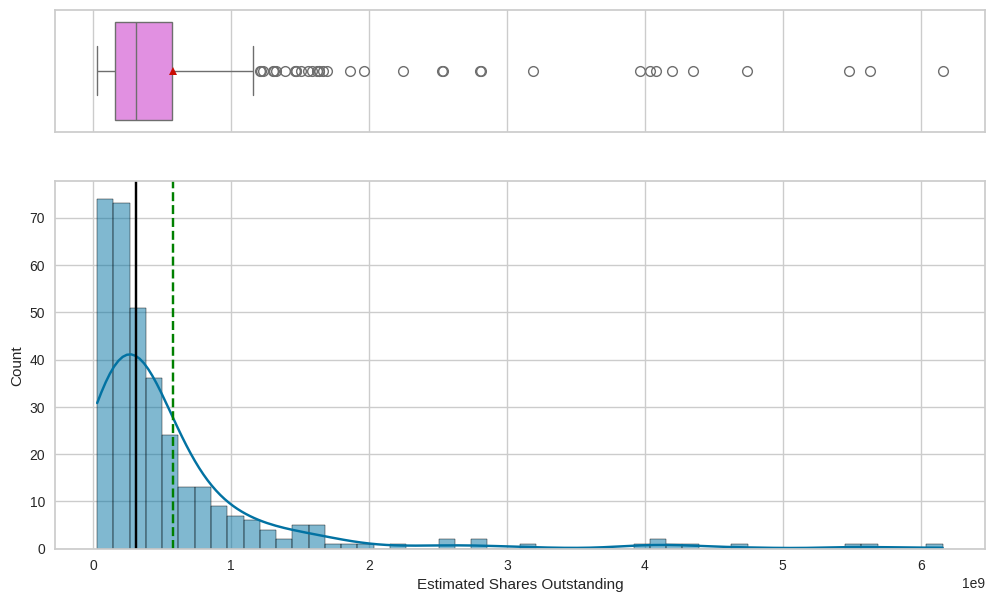

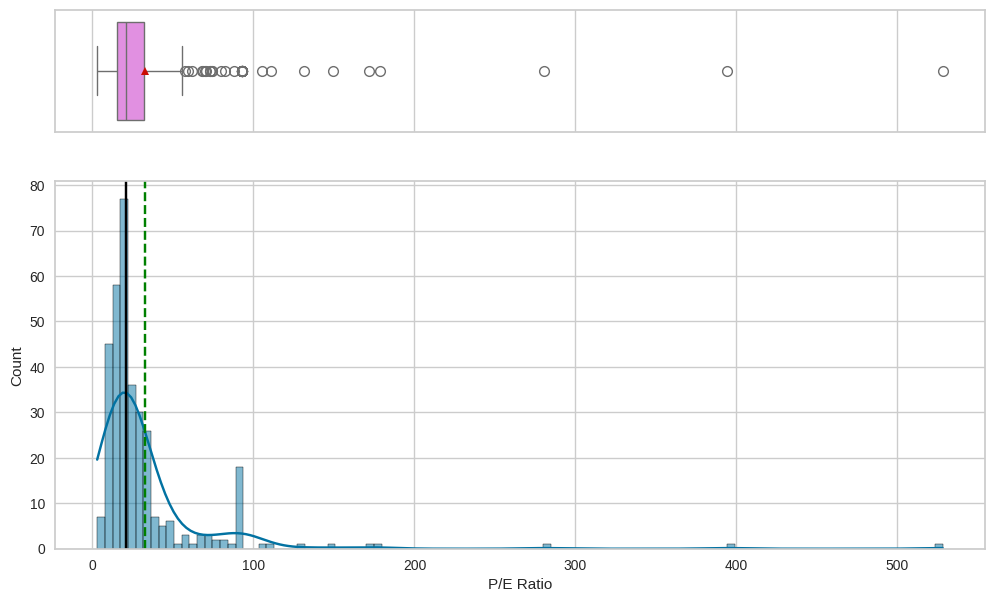

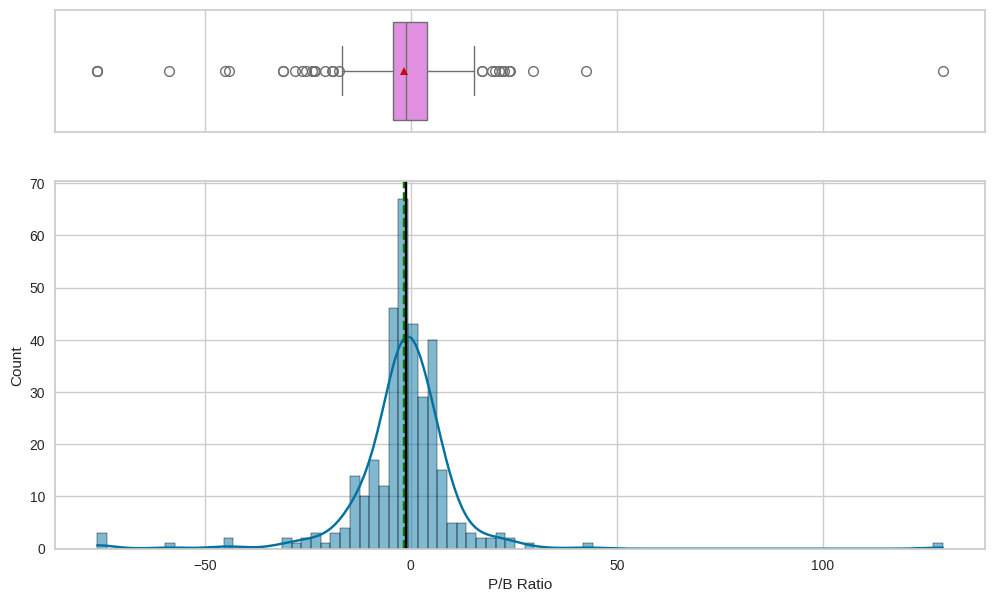

In [17]:
# Plot numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for i in num_cols:
    histogram_boxplot(df, i, kde=True)

- Current price of the stocks in the dataset has a right-skewed distribution. Most of the stocks have price below 200 dollars.
- The price change of stocks follows a normal distribution. Nearly 75% of the stocks have price increase in the past 13 weeks.
- The volatility of stock price in the past 13 weeks, ROE, cash ratio, estimated shares outstanding, and P/E ratio have right-skewed distributions.
- The net cash flow, net income, earnings per share, and P/B ratio generally follow the normal distribution.

## Bivariate Analysis

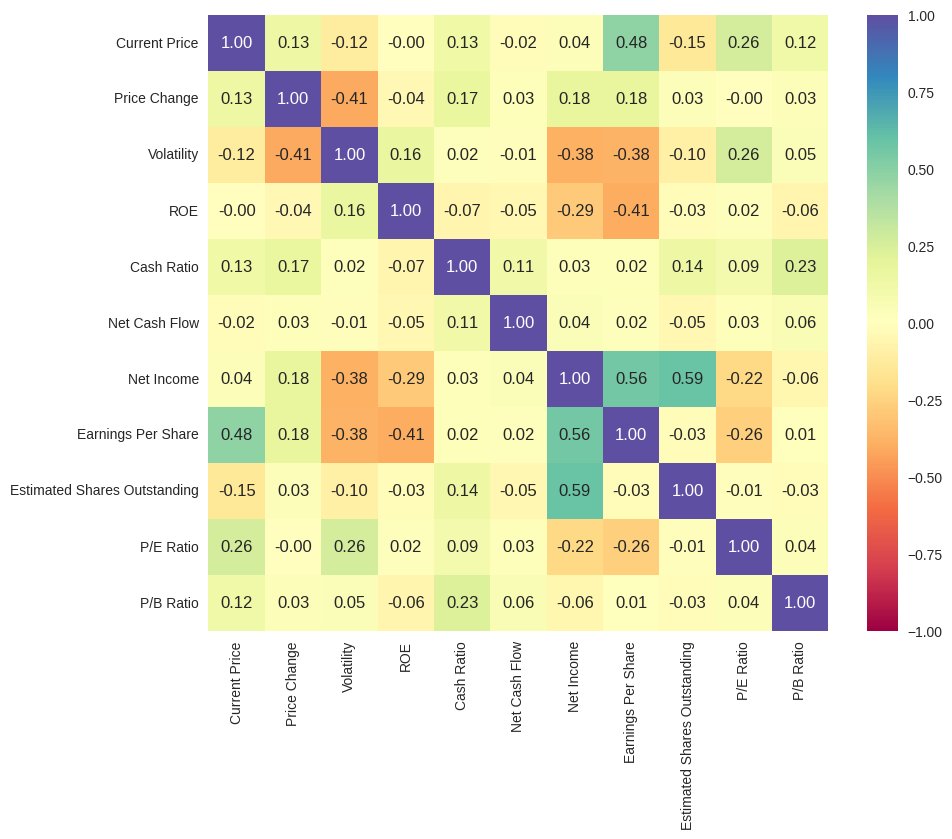

In [18]:
# Check the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1, fmt='.2f')
plt.show();

- From the correlation plot, it is shown that net income and estimated shares outstanding, net income and earnings per share, current price and earnings per share have relatively strong positive correlations. On the other hand, price change and volatility, ROE and earnings per share, volatility and net income, and volatility and earnings per share have relatively strong negative correlations.
- The rest data features have generally weak correlations.

<Figure size 1000x800 with 0 Axes>

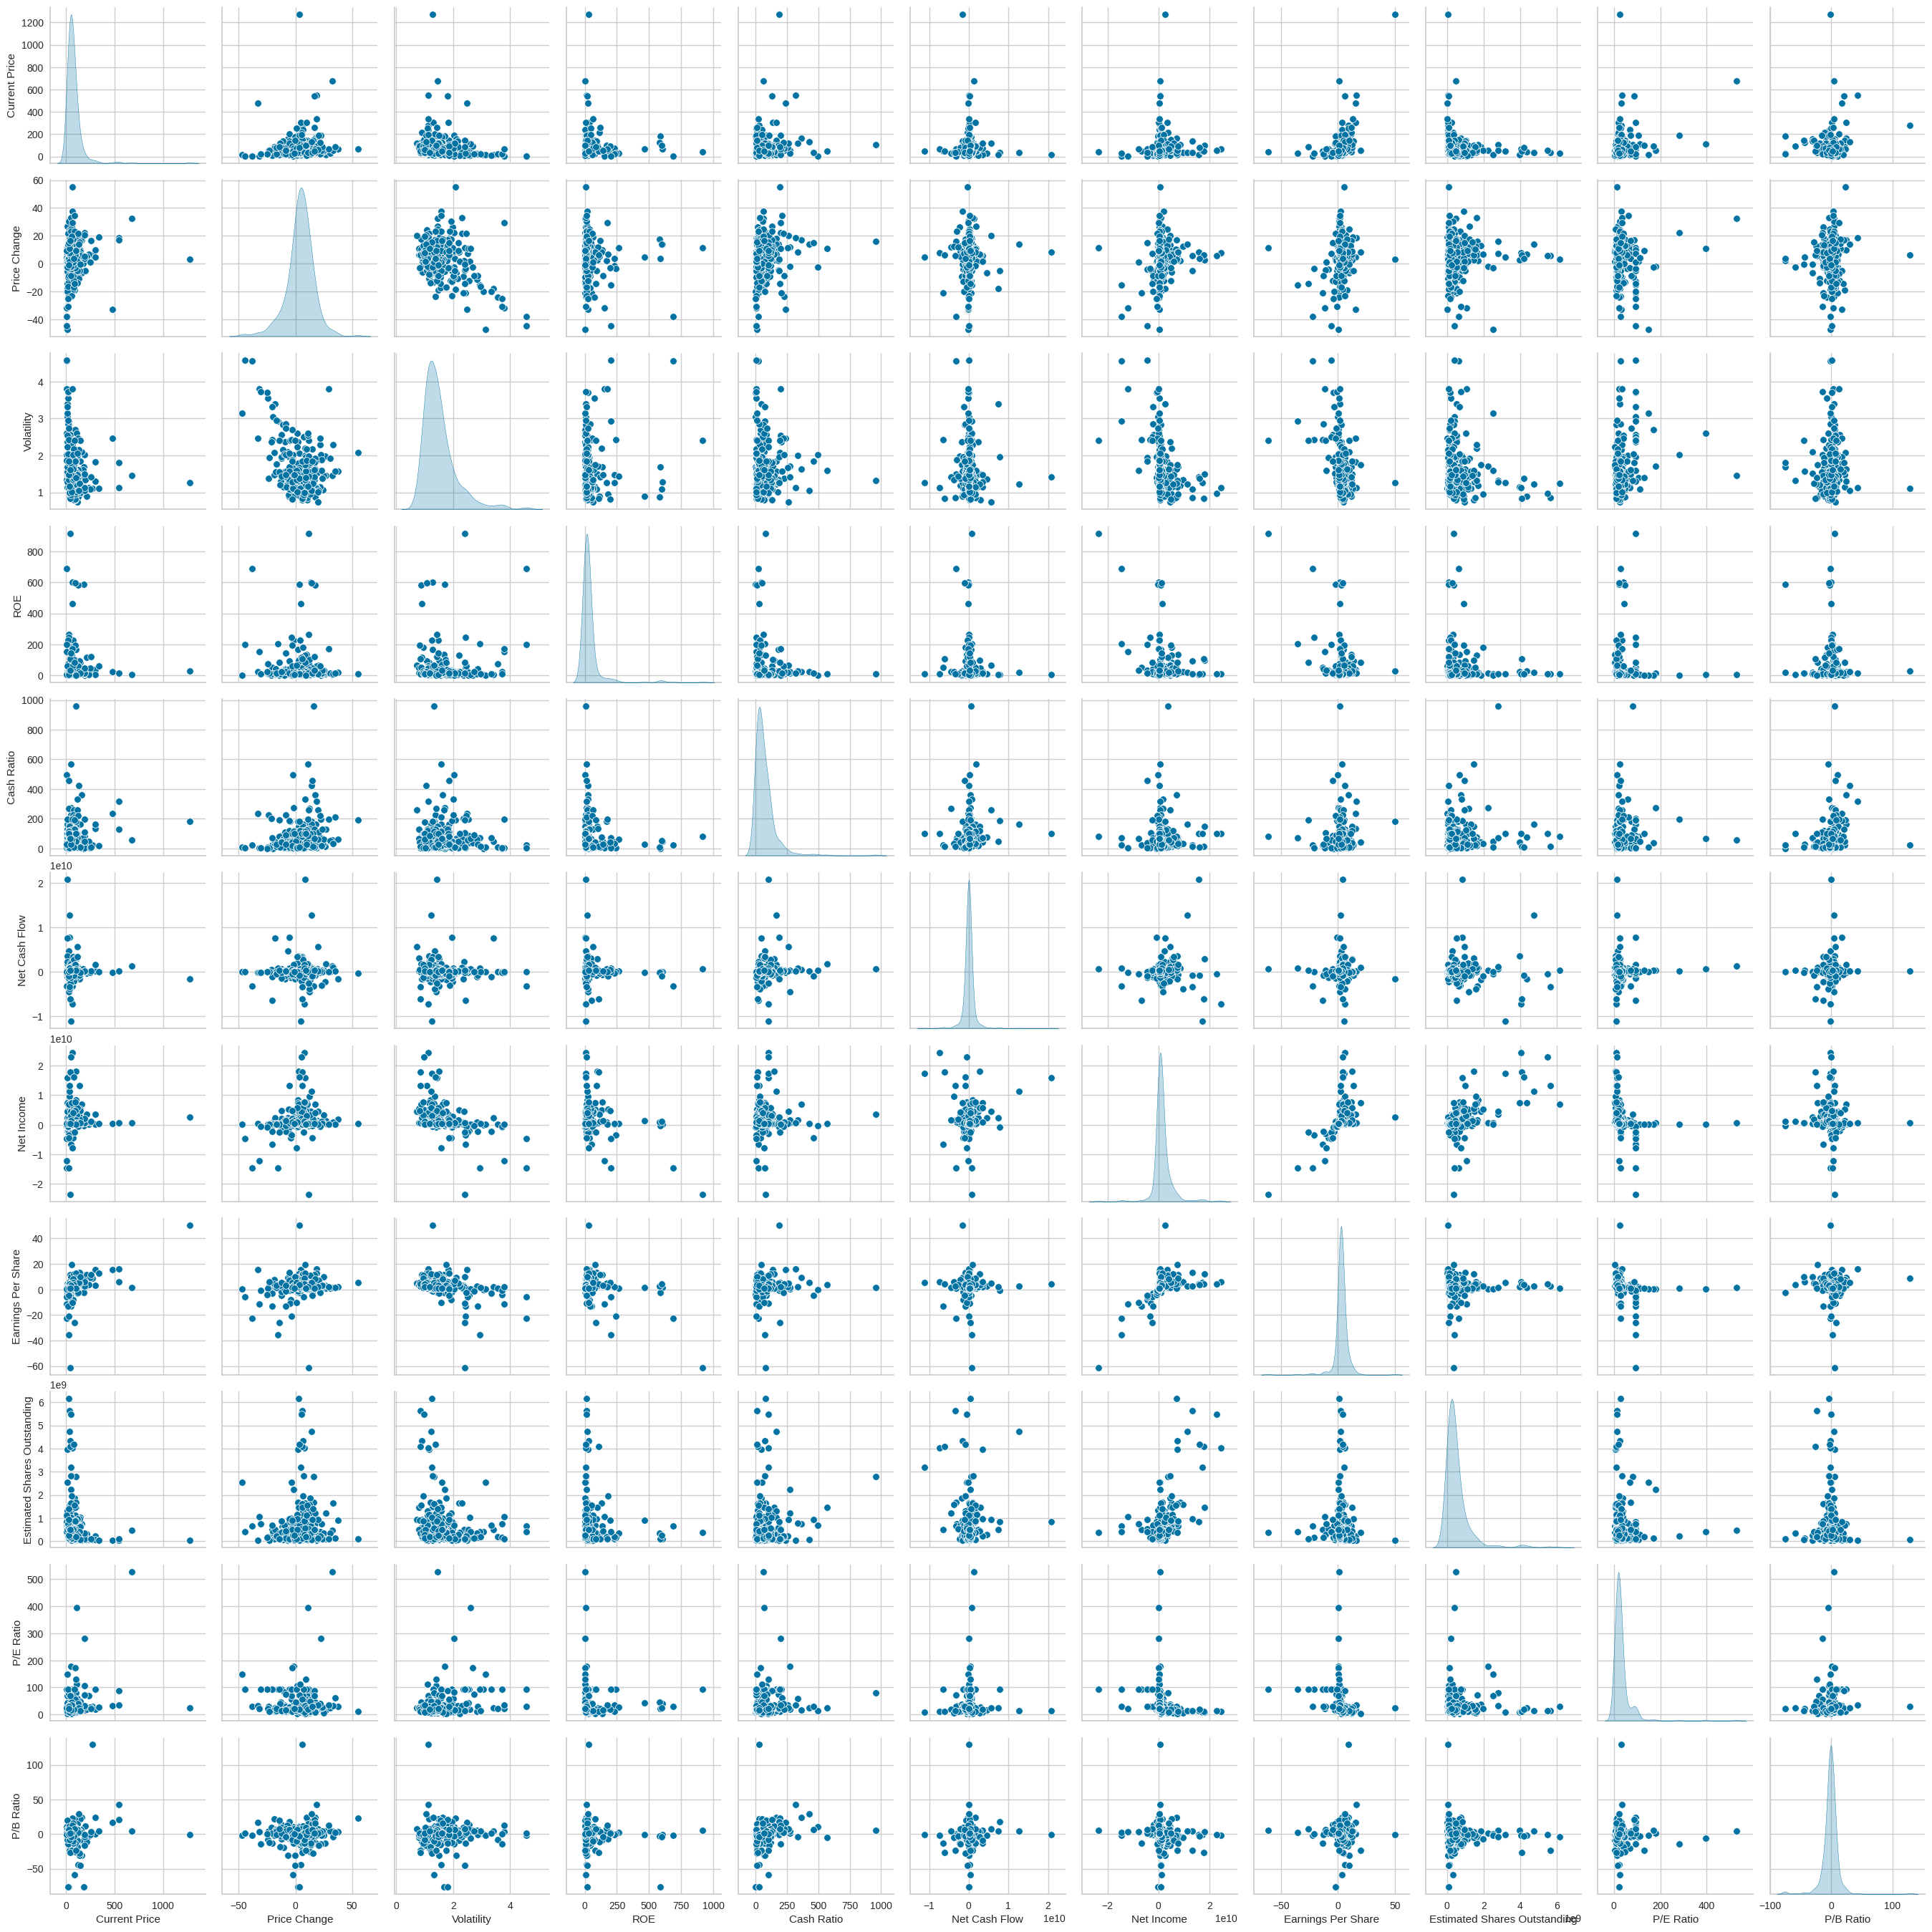

In [19]:
# Check the pair plot
plt.figure(figsize=(10,8))
sns.pairplot(df[num_cols], diag_kind='kde')
plt.show();

- All the data features seem to be normally distributed, except for the P/E ratio which shows a bimodal distribution.
- The relations between each pair of data features are weak.

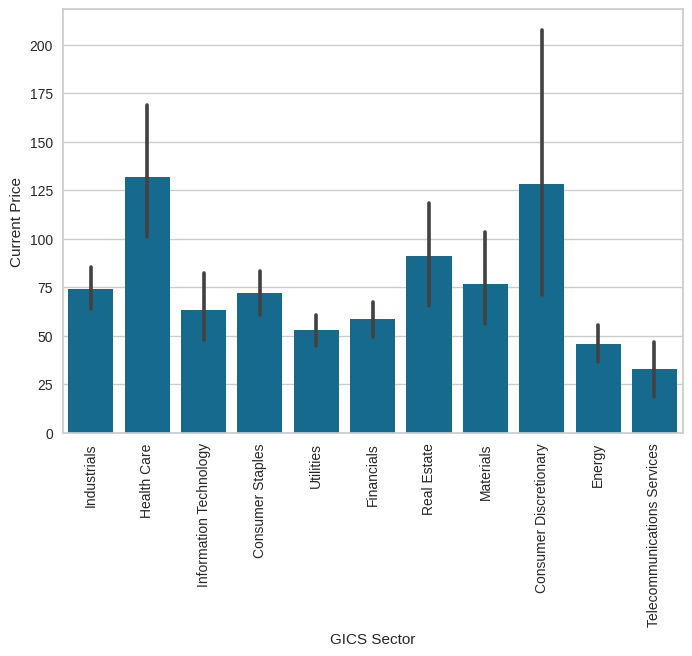

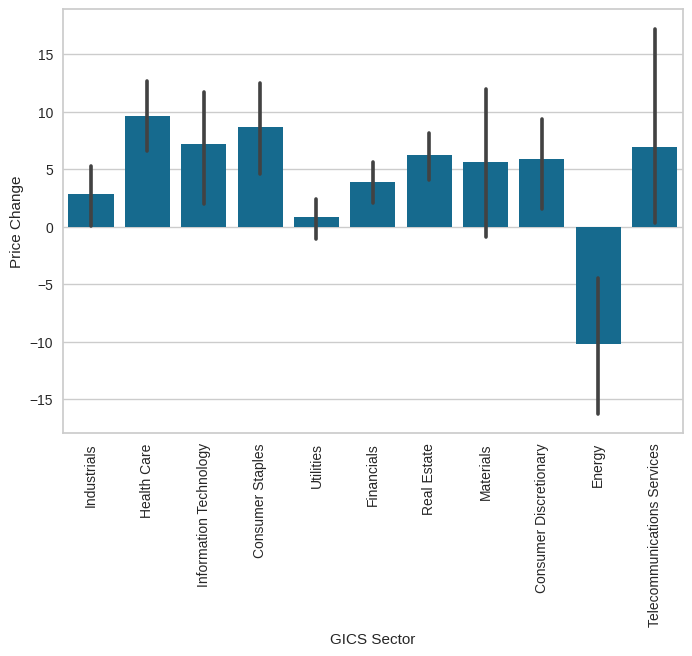

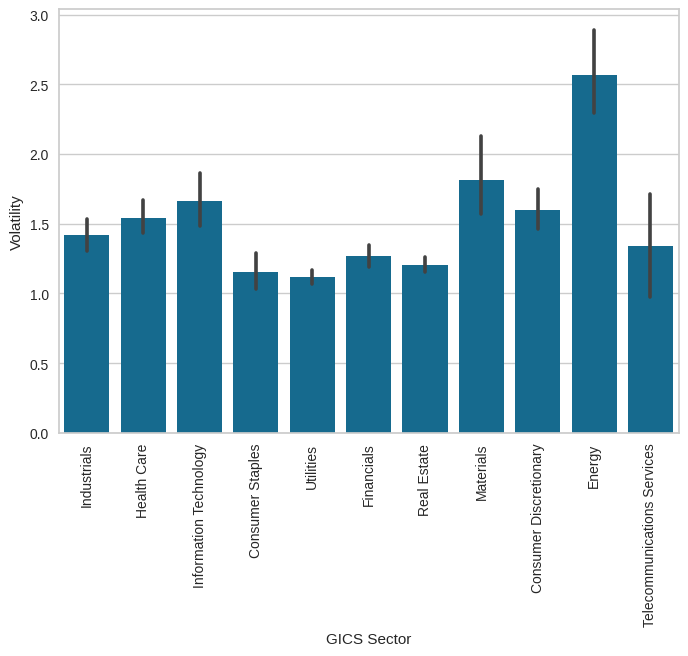

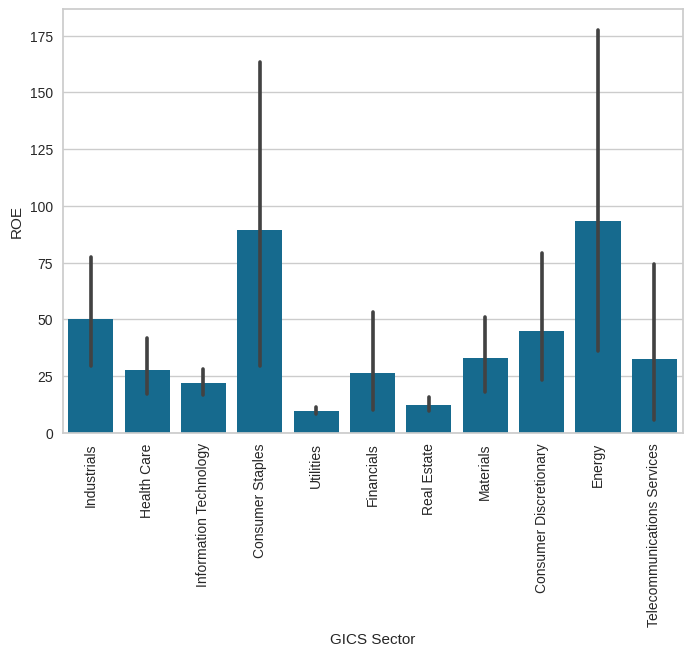

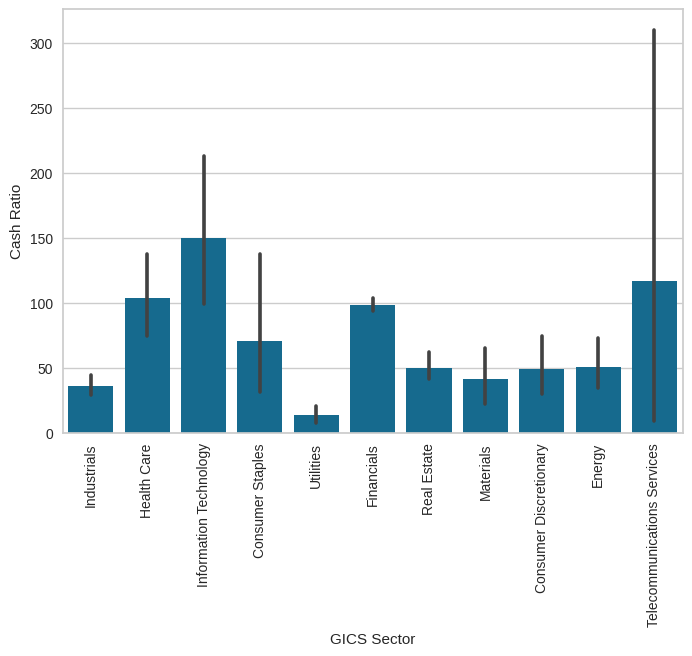

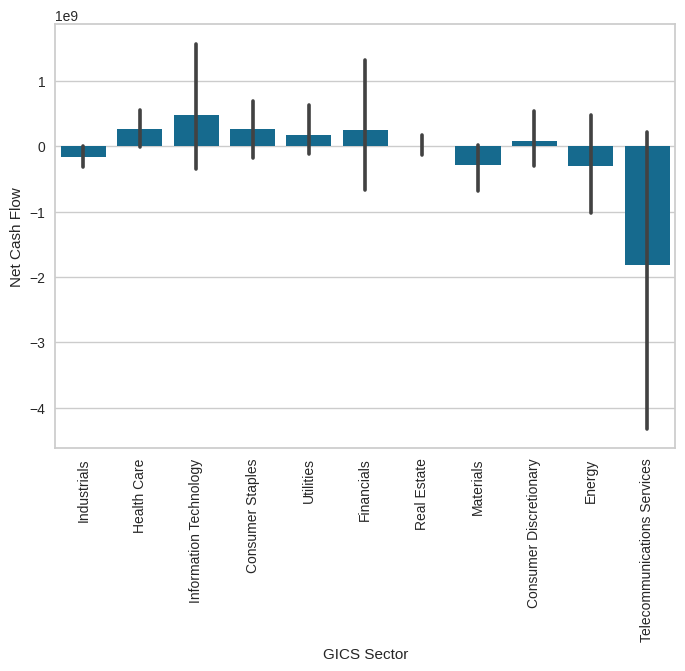

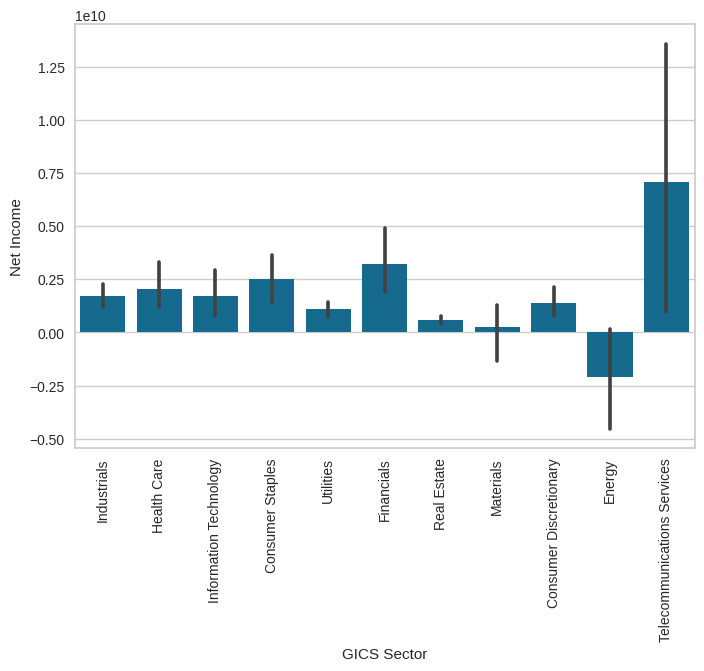

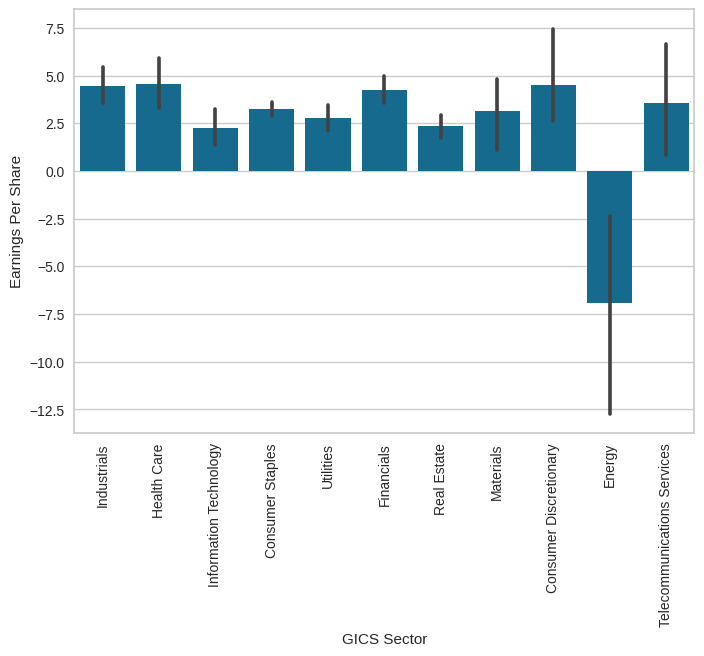

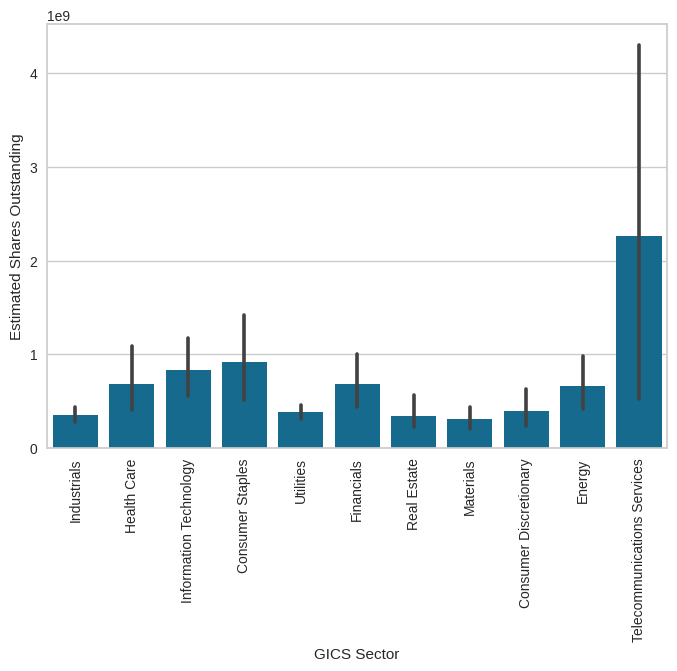

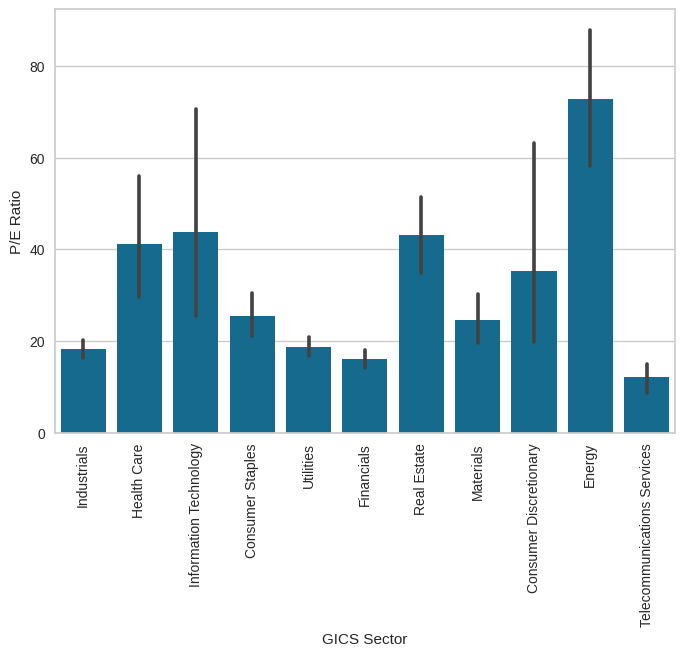

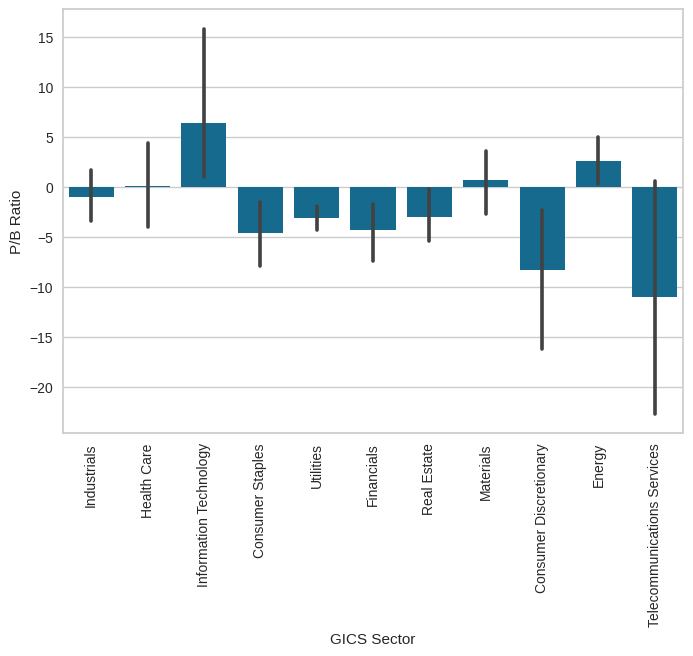

In [20]:
# Plot data features VS GICS Sectors
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for i in num_cols:
    sns.barplot(data=df, x='GICS Sector', y=i)
    plt.xticks(rotation=90)
    plt.show()

- Health care and consumer discretionary sectors have the highest current stock price, and Telecommunications services has the lowest stock price.
- Health care and consumer staples have the largest price increase and energy sector has the largest price decrease.
- Energy sector has the largest volatility compared to other sectors. Utilities sector has the lowest volatility.
- Energy and consumer staples have the largest ROE while utilities has the lowest ROE.
- Information technology has the largest cash ratio, while utilities has the lowest cash ratio.
- Information technology has the largest positive net cash flow, and telecommunications services sector has the largest net negative cash flow.
- Telecommunications services sector has the largest positive net income and energy sector has the largest net negative income.
- Industrials, health care, and consumer discretionary sectors have relatively high earnings per share. Energy sector has the largest negative earnings per share.
- Telecommunications services sector has the largest estimated shares outstanding.
- Energy sector has the largest P/E ratio and telecommunications services sector has the lowest P/E ratio.
- Information Technology sector has the largest positive P/B ratio. Telecommunications services sector has the largest negative P/B ratio.

### Answer to questions:

1. What does the distribution of stock prices look like?

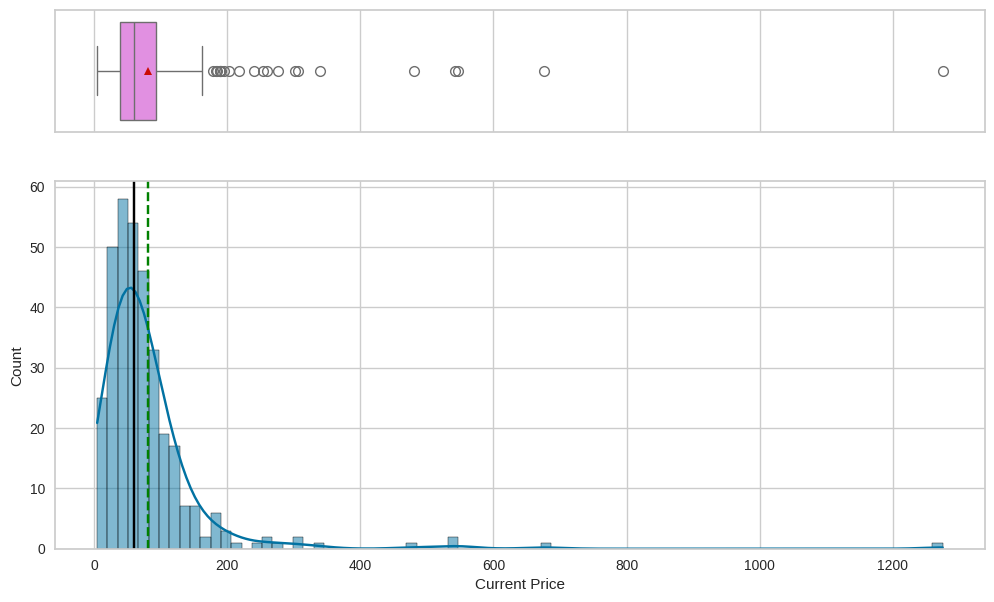

In [21]:
histogram_boxplot(df, 'Current Price', kde=True)

- The distribution of current stock price is right skewed.

2. The stocks of which economic sector have seen the maximum price increase on average?

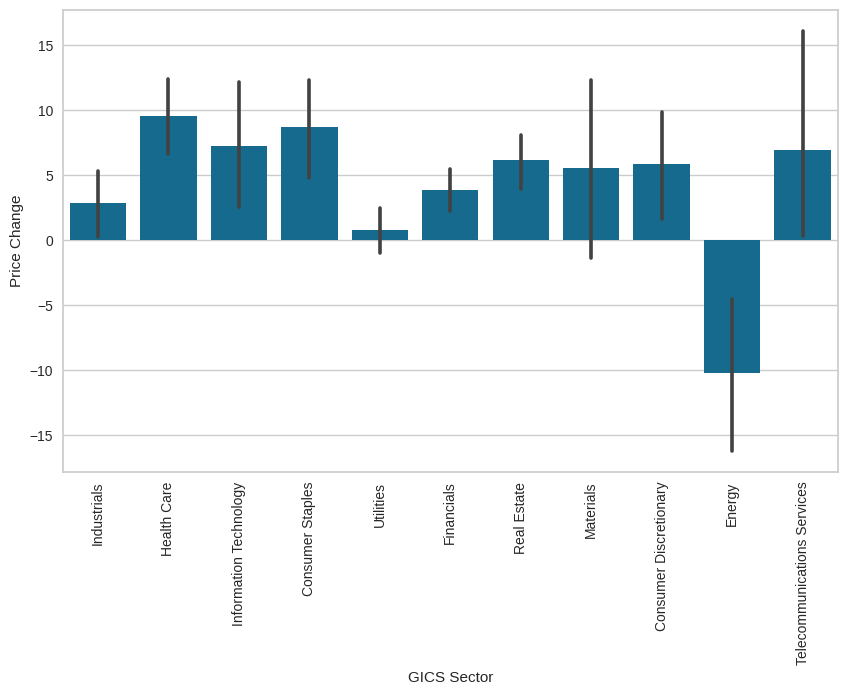

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='GICS Sector', y='Price Change')
plt.xticks(rotation=90)
plt.show()

In [23]:
df.groupby(df['GICS Sector'])['Price Change'].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64

- The stocks of health care economic sector have the maximum price increase on average.

3. How are the different variables correlated with each other?

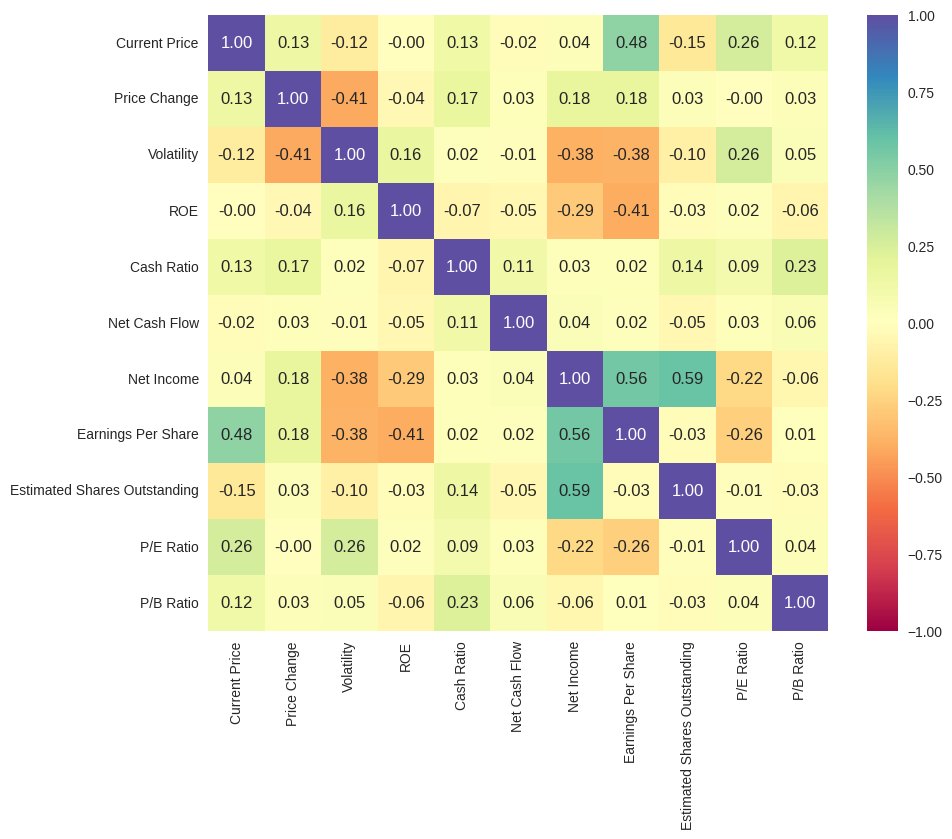

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'Spectral', vmin = -1, vmax = 1, fmt = '.2f')
plt.show();

- From the correlation plot, it is shown that net income and estimated shares outstanding, net income and earnings per share, current price and earnings per share have relatively strong positive correlations. On the other hand, price change and volatility, ROE and earnings per share, volatility and net income, and volatility and earnings per share have relatively strong negative correlations.
- The rest data features have generally weak correlations.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

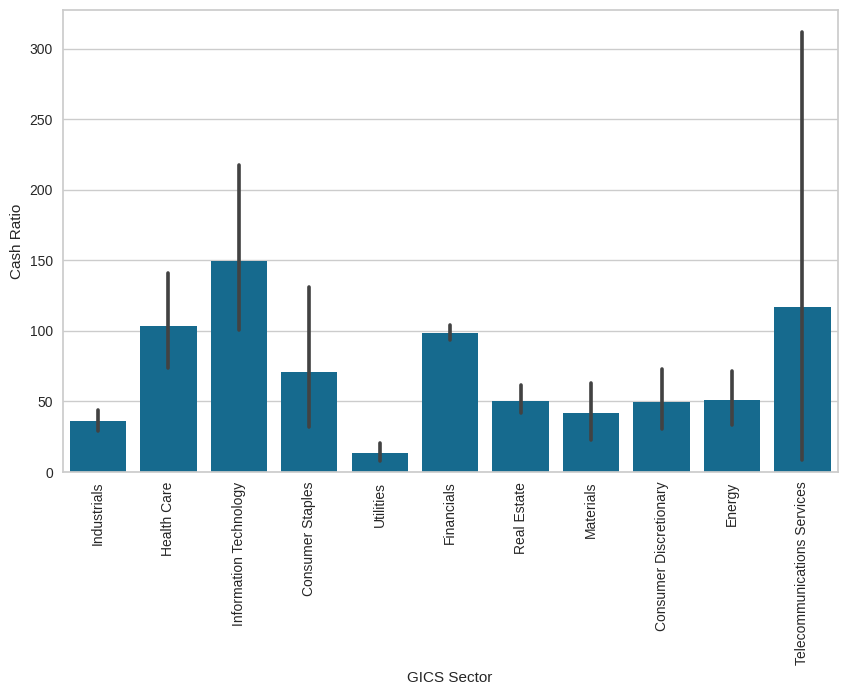

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio')
plt.xticks(rotation=90)
plt.show()

In [26]:
df.groupby(df['GICS Sector'])['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

- The information technology sector has the largest cash ratio. Telecommunications services and health care sectors also have large cash ratio. All these three economic sectors have cash ratio larger than 100.
- Utilities, industrials, and materials rank the lowest three economic sectors in the cash ratio.

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

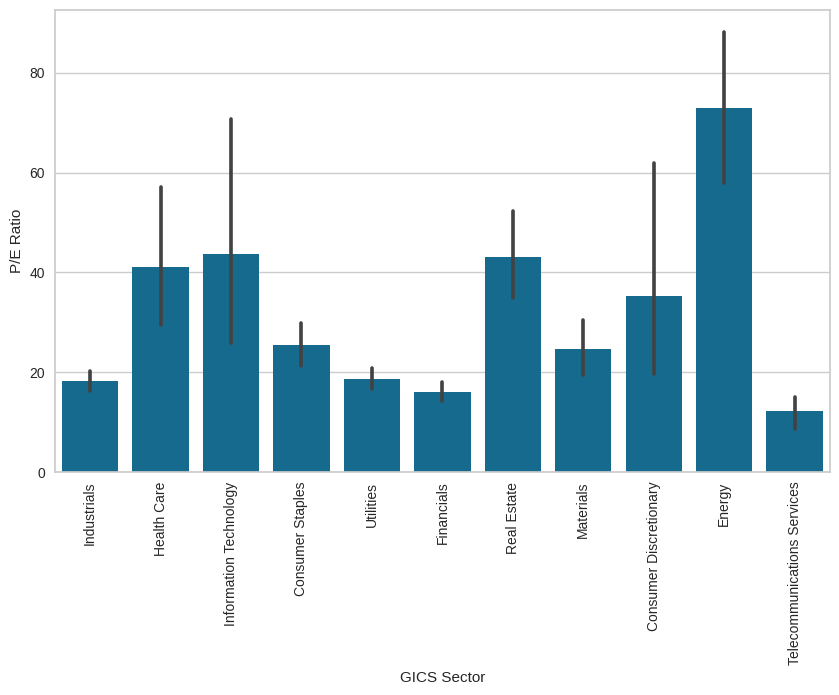

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.groupby(df['GICS Sector'])['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

- Energy sector has the largest P/E ratio. Information technology and real estate sectors rank the second and third largest in P/E ratio.
- Telecommunications services, financials, and industrials rank the lowest three P/E ratios.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

- As checked before, the stock dataset does not have duplicated value or missing value. Therefore, here we check the outliers.

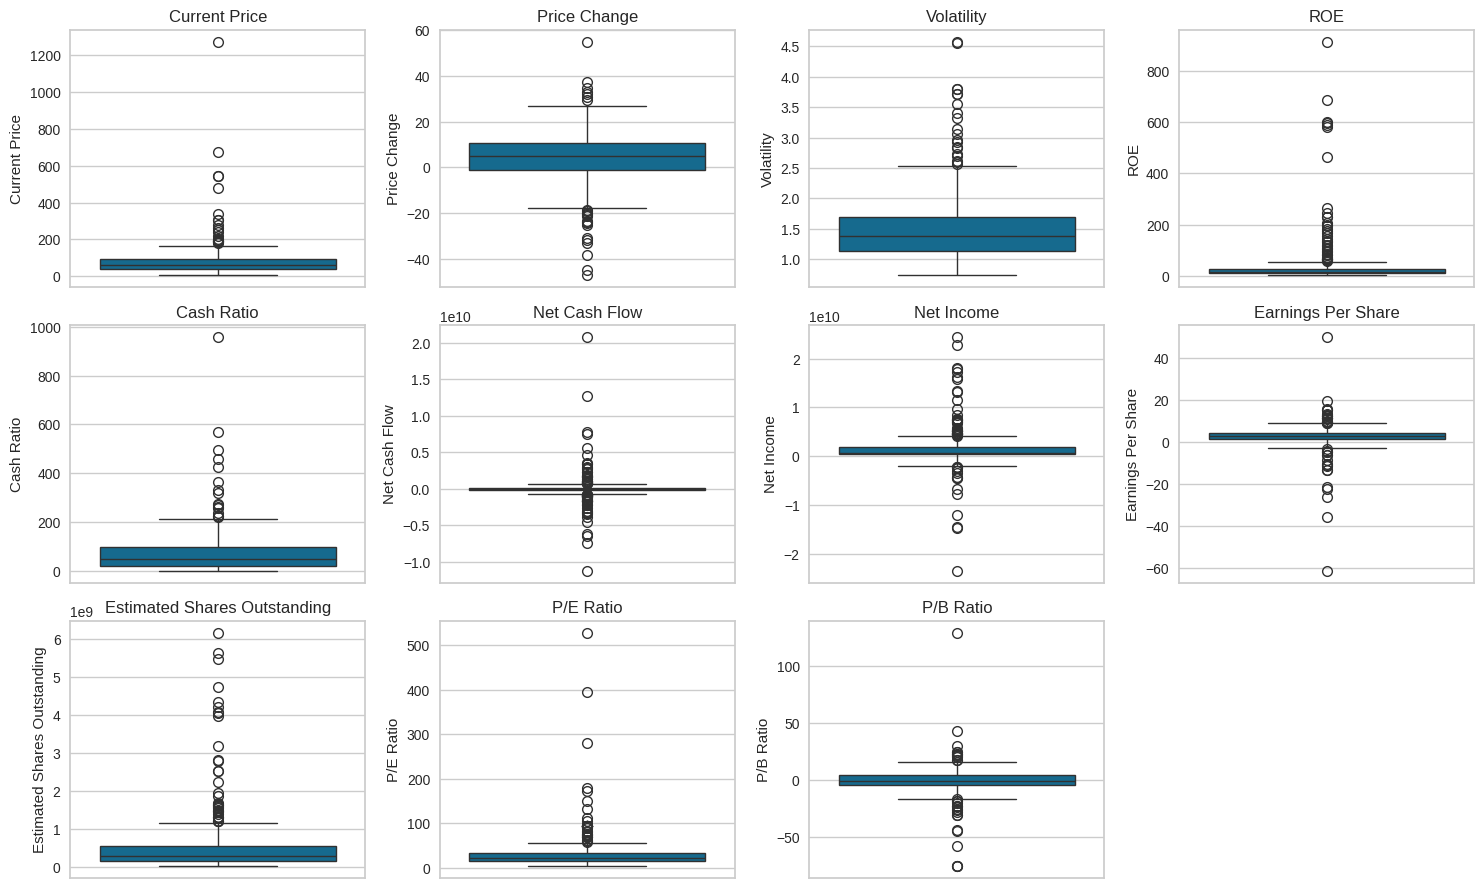

In [29]:
plt.figure(figsize=(15,12))

for i, variable in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are outliers in all the data features. But since it is hard to justify they are unreasonalble values, we will keep these outliers in the dataset.

### Data pre-processing

In [30]:
# Scale the numerical data before performing clustering analysis
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)

# Check the head of dataset
df_scaled.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

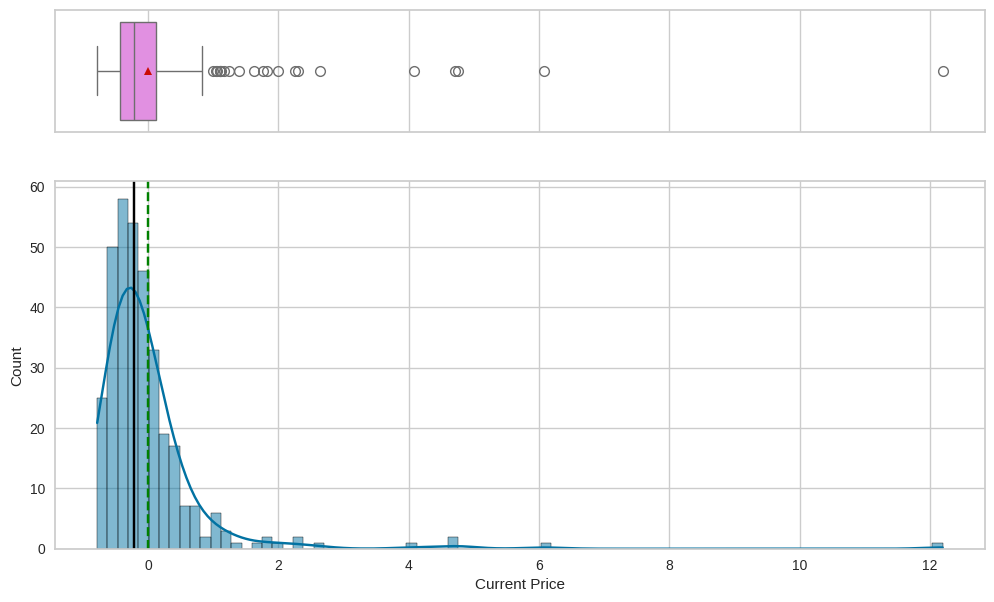

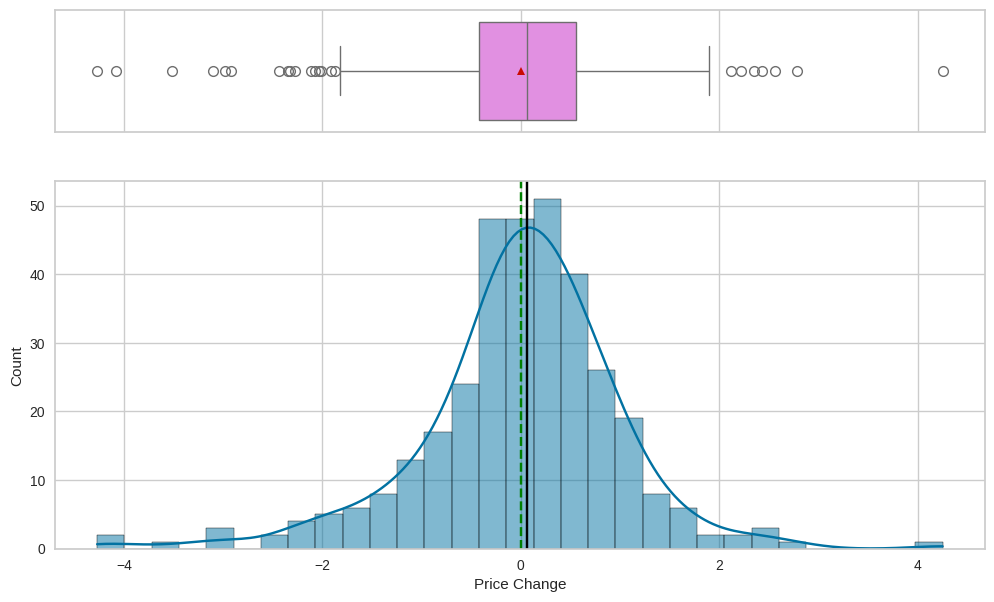

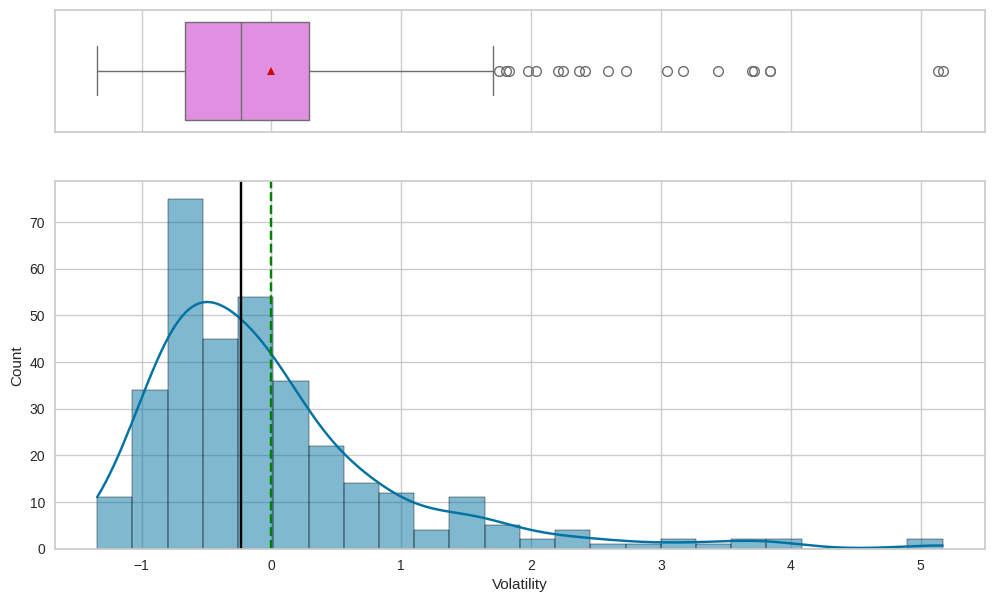

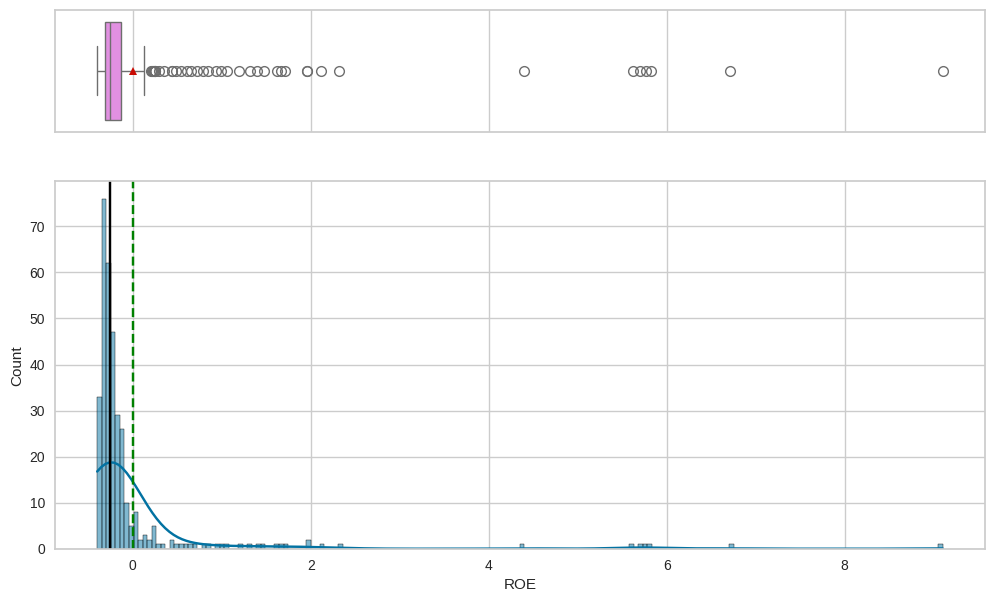

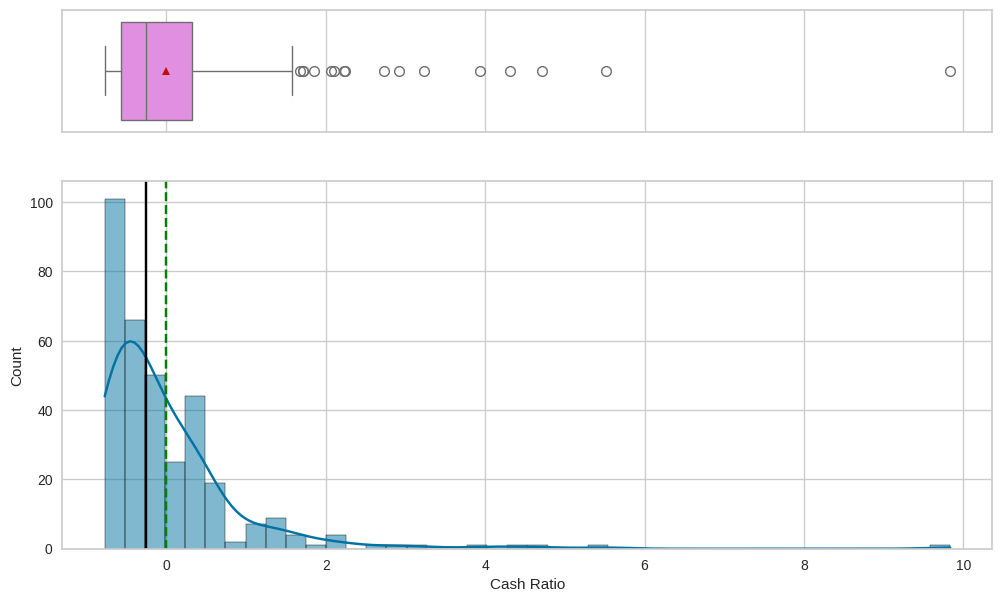

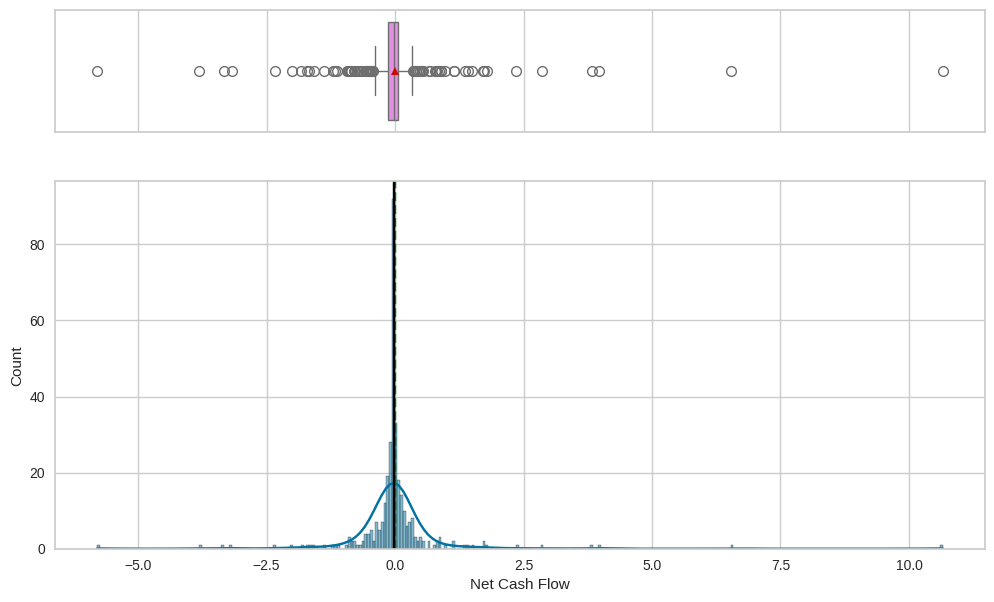

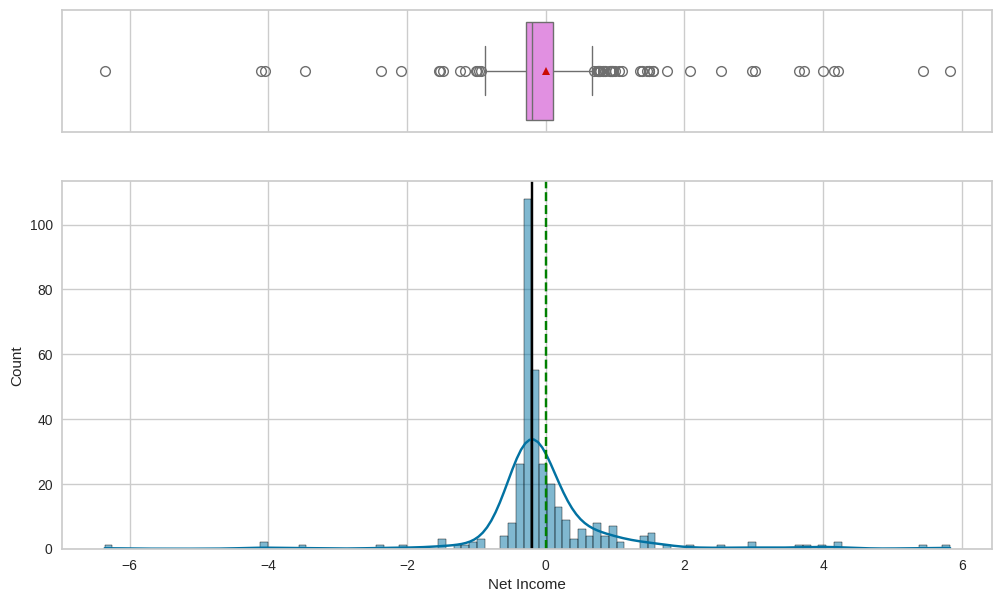

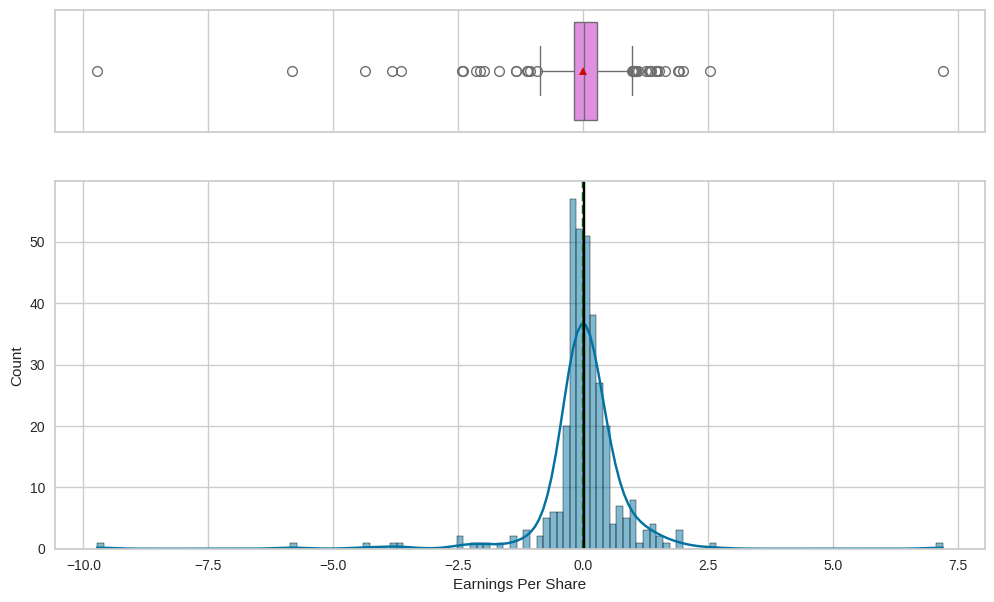

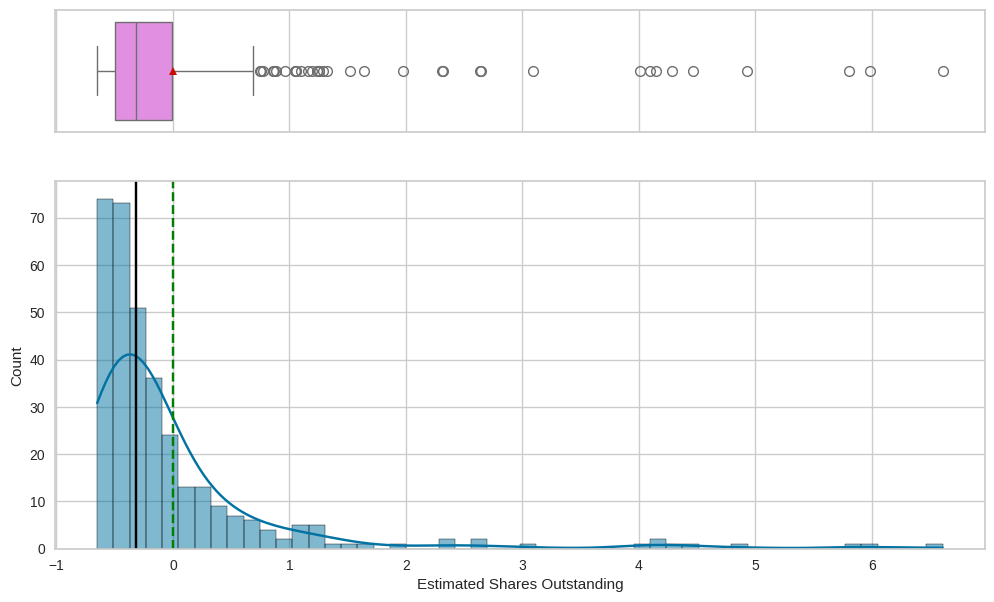

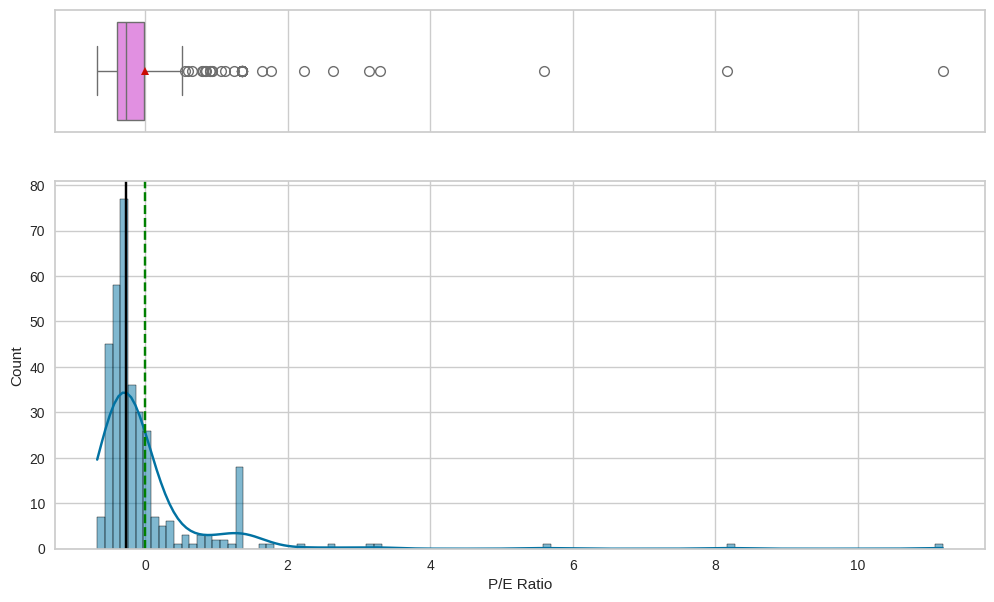

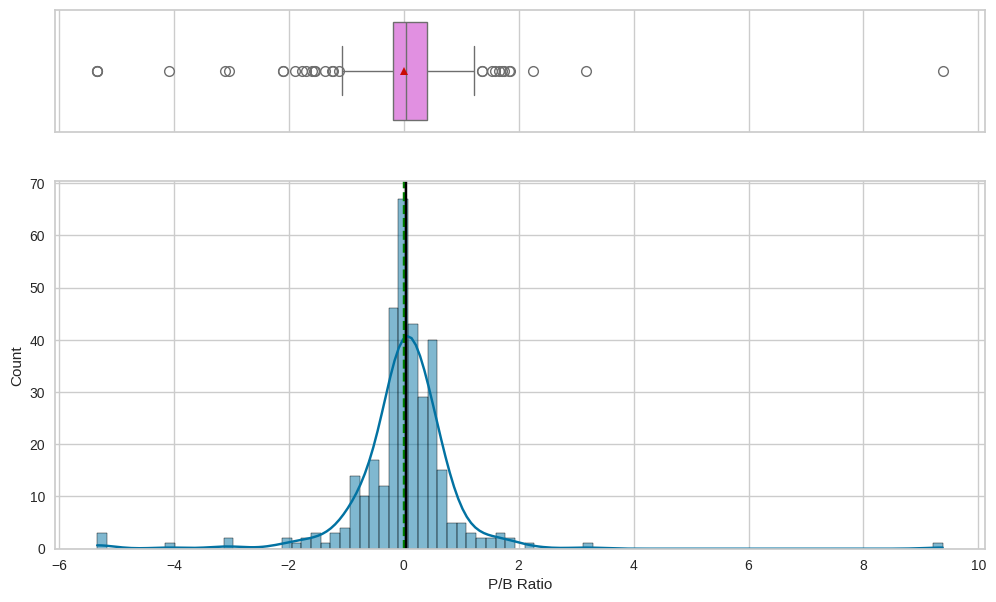

In [31]:
# Plot numerical columns
for i in df_scaled.columns:
    histogram_boxplot(df_scaled, i, kde=True)

- The scaled dataset does not show a difference compared to the original dataset.

## K-means Clustering

Number of clusters: 1 	Average Distortion: 2.5425069919221697
Number of clusters: 2 	Average Distortion: 2.382318498894466
Number of clusters: 3 	Average Distortion: 2.269236715539074
Number of clusters: 4 	Average Distortion: 2.175554082632614
Number of clusters: 5 	Average Distortion: 2.136852169310594
Number of clusters: 6 	Average Distortion: 2.0713095032364506
Number of clusters: 7 	Average Distortion: 1.9775989987671811
Number of clusters: 8 	Average Distortion: 1.9652603012304684
Number of clusters: 9 	Average Distortion: 1.9311613101229936
Number of clusters: 10 	Average Distortion: 1.8502089919483544
Number of clusters: 11 	Average Distortion: 1.8248014803579016
Number of clusters: 12 	Average Distortion: 1.7525839358924045
Number of clusters: 13 	Average Distortion: 1.722563828836958
Number of clusters: 14 	Average Distortion: 1.6925733787700508
Number of clusters: 15 	Average Distortion: 1.6942524979555502
Number of clusters: 16 	Average Distortion: 1.6217183500617904
Number

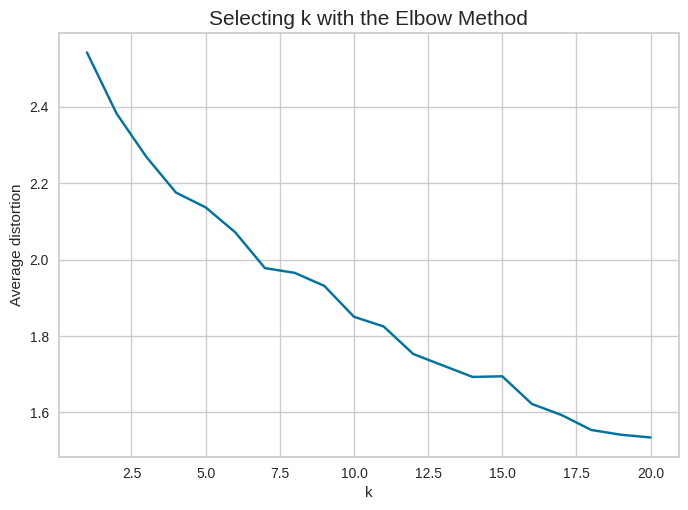

In [32]:
# Use the elbow method to determine k
clusters = range(1,21)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = sum(np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1)) / df_scaled.shape[0]
    meanDistortions.append(distortion)

    print("Number of clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method', fontsize=15)
plt.show()

- The appropriate k value could be 4, 5, 7, 8, or 11, 12.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.43169988466492354
For n_clusters = 6, silhouette score is 0.36698524210914063
For n_clusters = 7, silhouette score is 0.10587349598463779
For n_clusters = 8, silhouette score is 0.40021596082234684
For n_clusters = 9, silhouette score is 0.4051539505522535
For n_clusters = 10, silhouette score is 0.1147132918355368
For n_clusters = 11, silhouette score is 0.16268826704862685
For n_clusters = 12, silhouette score is 0.12883008320005324
For n_clusters = 13, silhouette score is 0.1744804713048242
For n_clusters = 14, silhouette score is 0.17457839075773943
For n_clusters = 15, silhouette score is 0.13292390538523347
For n_clusters = 16, silhouette score is 0.14094489052173872
For n_clusters = 17, silhouette score is 0.14983298160366273
For n_clusters = 18, silhouette scor

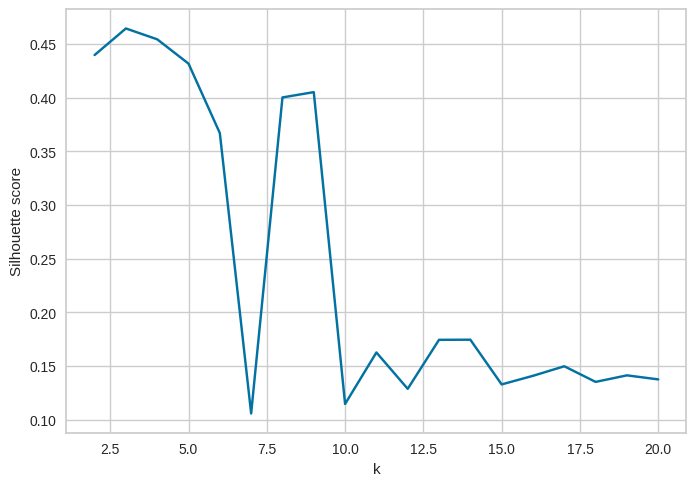

In [33]:
# Check the silhouette score
sil_score = []
cluster_list = list(range(2,21))

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show();

- Since the silhouette score is high at k=4, we will try k as 4 for the K-mean clustering.

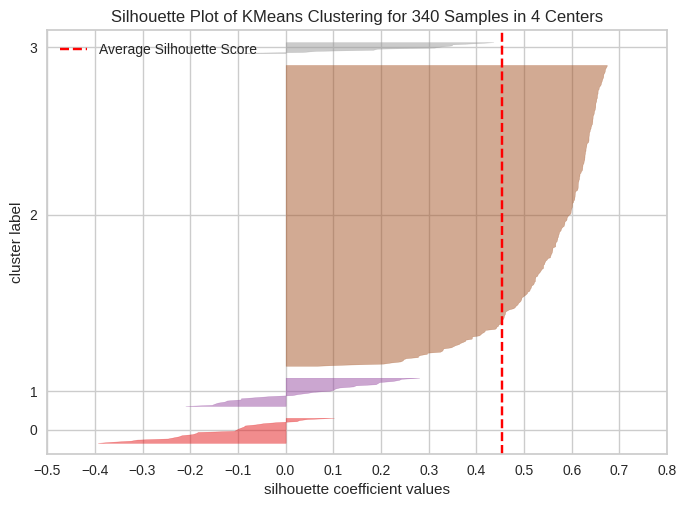

In [34]:
# Find optimal cluster number using silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show();

- There are many negative silhouette coefficient values for cluster 1, cluster 2, and cluster 3, which mean they are misclassified.
- Since k = 8, 11 and 12 are also potential options, we can try k value of 8, 11 and 12.

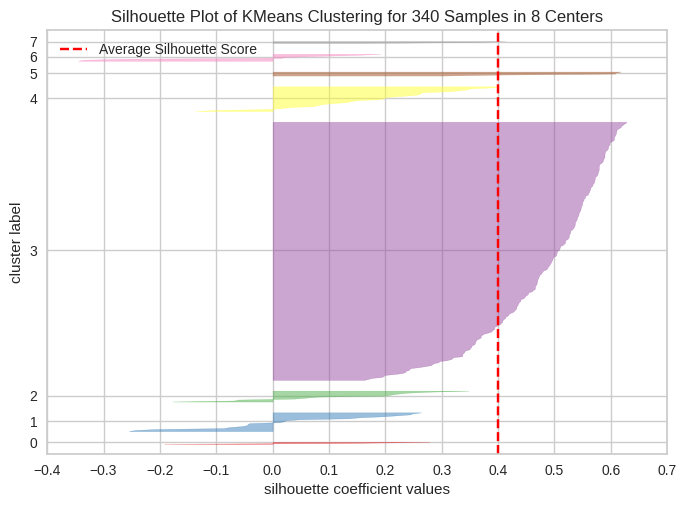

In [35]:
# Find optimal cluster number using silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(df_scaled)
visualizer.show();

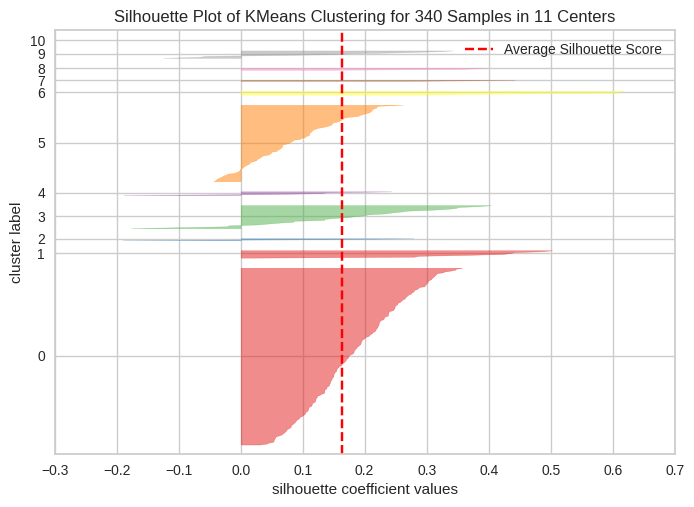

In [36]:
# Find optimal cluster number using silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))
visualizer.fit(df_scaled)
visualizer.show();

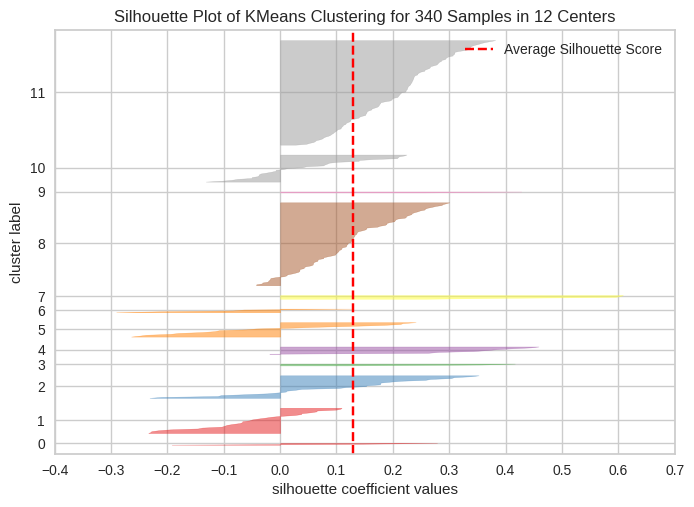

In [37]:
# Find optimal cluster number using silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(12, random_state=1))
visualizer.fit(df_scaled)
visualizer.show();

- The assigned clusters still have negative silhouette coefficient values for a few clusters. The assigned clusters with k=11 looks slightly better than the clusters assigned with other k values.

#### Create the final model

- Let's select 11 as the number of clusters since silhouette score is relatively high and there is a knick at 11 in the elbow curve.

In [38]:
# Create the final model
kmeans = KMeans(n_clusters=11, random_state=1)
kmeans.fit(df_scaled)

KMeans(n_clusters=11, random_state=1)

In [39]:
df["KM Cluster"] = kmeans.labels_
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  KM Cluster  
0                  6.681299e+08    3.718174  -8.784219           0  
1                  1.633016e+09   18.806350  -8.750068           5  
2                  1.504422e+09   15.275510  -0.394171           5  
3                  4.996437e+08   74.555557   4.199651           5  
4                  2.247994e+09  178.451613   1.059810           9

### Cluster Profiling

In [40]:
cluster_profile = df[num_cols].groupby(df["KM Cluster"]).mean()
cluster_profile["count_in_each_segment"] = df[num_cols].groupby(df["KM Cluster"])["Current Price"].count()

In [41]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [42]:
for cl in df["KM Cluster"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["KM Cluster"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.' 'Church & Dwight'
 'C. H. Robinson Worldwide' 'CIGNA Corp.' 'Cincinnati Financial'
 'Comerica Inc.' 'CME Group Inc.' 'Cummins Inc.' 'CMS Energy'
 'CenterPoint Energy' 'Capital One Financial' 'The Cooper Companies'
 'CSX Corp.' 'CenturyLink Inc' 'Cognizant Techn

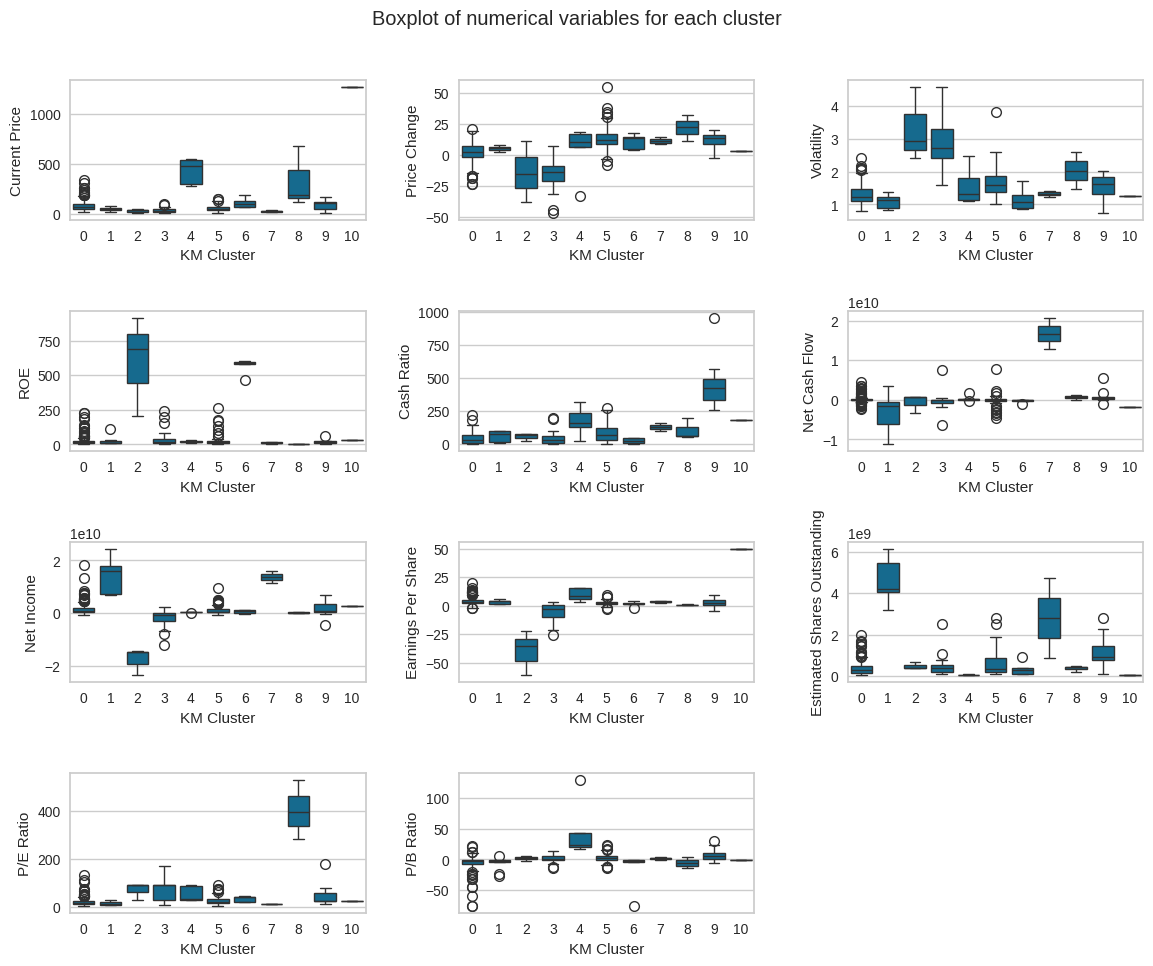

In [43]:
plt.figure(figsize=(12,10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="KM Cluster", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='KM Cluster'>

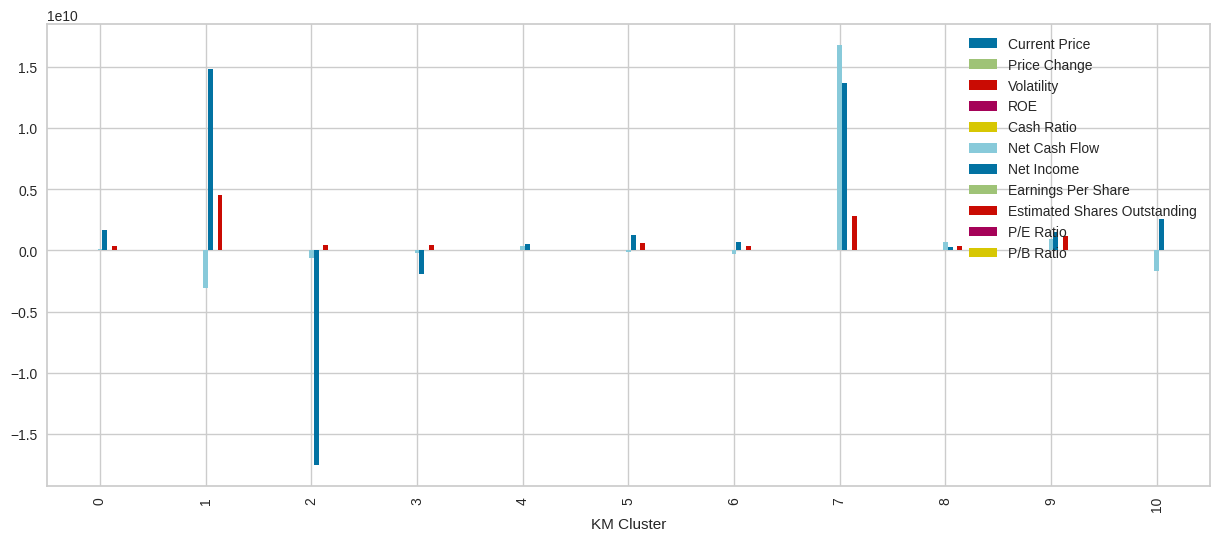

In [44]:
df[num_cols].groupby(df["KM Cluster"]).mean().plot.bar(figsize=(15, 6))

### Insights

- **Cluster 0**:
    - This cluster has the most data count.
    - Current price, price change, ROE, cash ratio, estimated shares outstanding, have relatively median values compared to other clusters.
    - P/B ratio has negative values.

- **Cluster 1**
    - Has highest positive net income and estimated shares outstanding.
    - Has large negative net cash flow and negative P/B ratio.
    - Has relatively low current price and lowest volatility.

- **Cluster 2**
    - Has the highest volatility and ROE.
    - Has relatively low current price.
    - Has price decrease, negative net cash flow, net income, and earnings per share.

- **Cluster 3**
    - Has the largest price decrease.
    - Has the second highest P/E ratio.
    - Has negative cash flow, net income, and earnings per share.

- **Cluster 4**
    - Has the largest P/B ratio.
    - Has the second highest current price.
    - Has relatively good price increase, cash ratio, positive cash flow, net income, and earnings per share.

- **Cluster 5**
    - Has second largest price increase.
    - Has negative net cash flow, but positive net income and earnings per share.

- **Cluster 6**
    - Has relatively high current price and price increase.
    - Has the second highest ROE.
    - Has negative cash flow but positive net income and earnings per share.

- **Cluster 7**
    - Has largest net positive cash flow.
    - Has the second largest net positive income and estimated shares outstanding.
    - Has lowest current price and P/E ratio.

- **Cluster 8**
    - Has highest price increase and P/E ratio.
    - Has lowest ROE.
    - Has high current price, high volatility, cash ratio, positive cash flow and income.
    - Has negative P/B ratio.

- **Cluster 9**
    - Has highest cash ratio.
    - Has second largest net positive cash flow and P/B ratio.
    - Has relatively high current price, price increase, net positive income, shares outstanding, and P/E ratio.

- **Cluster 10**
    - Has only one data in this cluster.
    - Has highest current price and earnings per share.
    - Has negative cash flow and P/B ratio but positive income.


## Hierarchical Clustering

#### Check Cophenetic Correlation

In [45]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenetic_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print("Cophenetic correlation for {} distance and {} linkage is {}.".format(dm, lm, c))

        if c > high_cophenetic_corr:
            high_cophenetic_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print("")
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage method.".format(
    high_cophenetic_corr, high_dm_lm[0], high_dm_lm[1]))

Cophenetic correlation for euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

### Check different linkage methods with euclidean distance

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenetic_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage method is {}.".format(lm, c))
    if c > high_cophenetic_corr:
        high_cophenetic_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

print("")
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage method.".format(
    high_cophenetic_corr, high_dm_lm[0], high_dm_lm[1]))

Cophenetic correlation for single linkage method is 0.9232271494002922.
Cophenetic correlation for complete linkage method is 0.7873280186580672.
Cophenetic correlation for average linkage method is 0.9422540609560814.
Cophenetic correlation for centroid linkage method is 0.9314012446828154.
Cophenetic correlation for ward linkage method is 0.7101180299865353.
Cophenetic correlation for weighted linkage method is 0.8693784298129404.

Highest cophenetic correlation is 0.9422540609560814, which is obtained with euclidean distance and average linkage method.


- Therefore, the cophenetic correlation is highest with euclidean distance and average linkage method.

### Check dendrogram

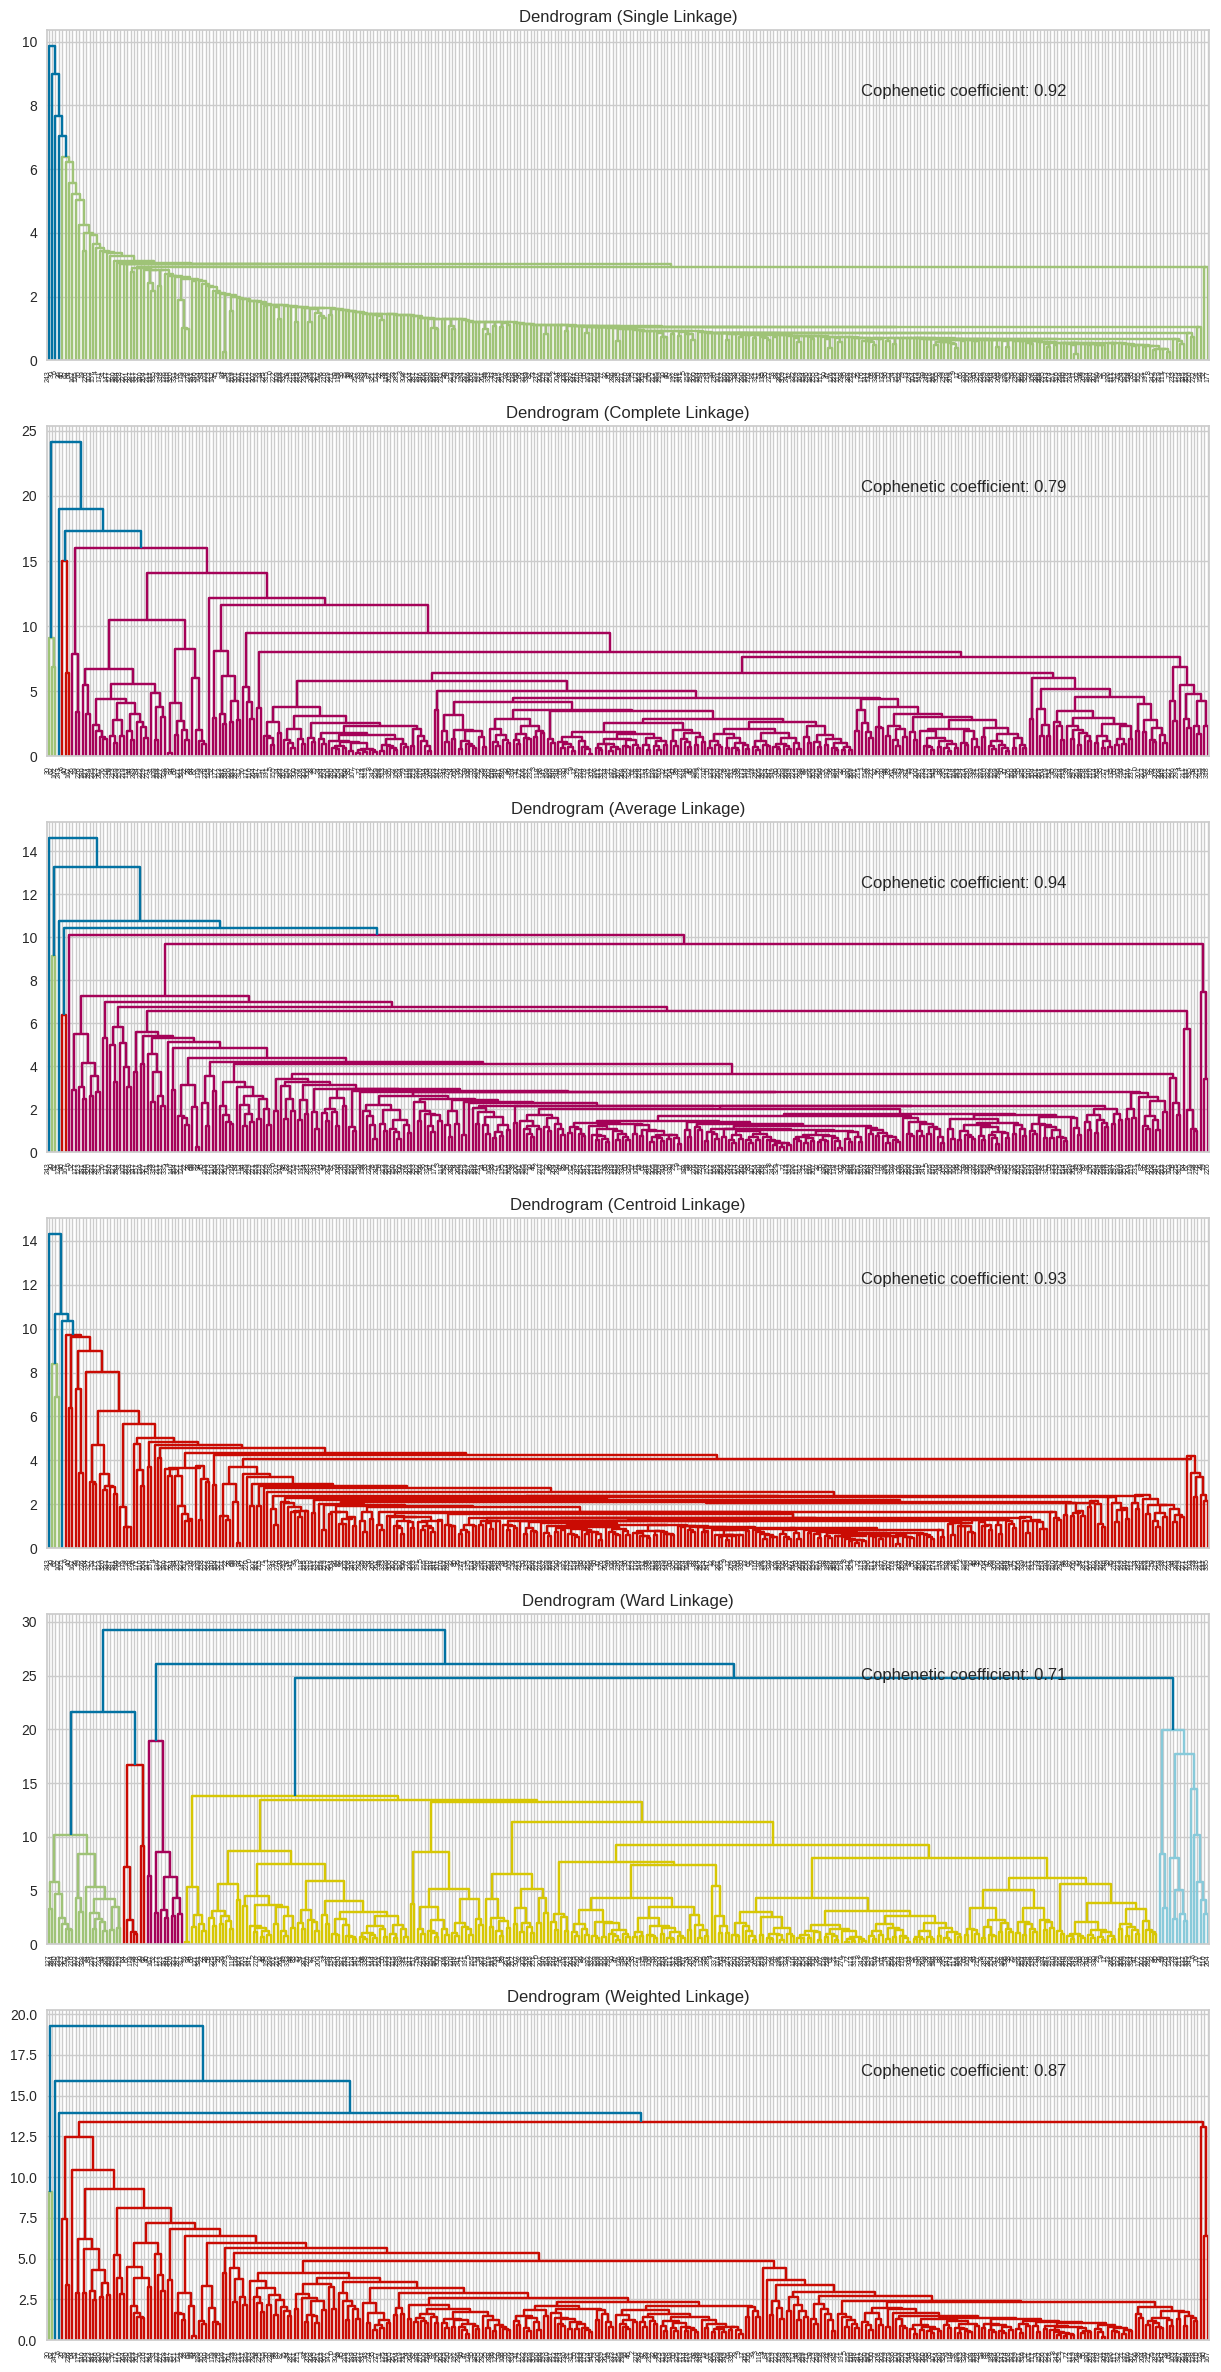

In [47]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# list to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# create plot
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(f"Cophenetic coefficient: {coph_corr:0.2f}", (0.7,0.8), xycoords="axes fraction")


- The cophenetic correlation is highest again for average linkage method. Thus, we will select this linkage method with the euclidean distance.
- 7 seems to be an appropriate selection for the cluster number.

### Create the model and check cluster profiles

In [48]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [49]:
df1 = df.copy()
df1["HC Cluster"] = HCmodel.labels_
df1.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  KM Cluster  HC Cluster  
0                  6.681299e+08    3.718174  -8.784219           0           6  
1                  1.633016e+09   18.806350  -8.750068           5           6  
2                  1.504422e+09   15.275510  -0.394171           5           6  
3                  4.996437e+08   74.555557   4.199651           5           6  
4                  2.247994e+09  178.451613   1.059810           9           6

### Cluster Profiling

In [50]:
cluster_profile1 = df1[num_cols].groupby(df1["HC Cluster"]).mean()
cluster_profile1["count_in_each_segment"] = df1[num_cols].groupby(df1["HC Cluster"])["Current Price"].count()
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

- It seems the count of data is only 1 or 2 or 3 in six clusters, and the rest data all belong to the cluster 6. Therefore, this clustering does not seem to be a good choice.
- We can try the euclidean distance with ward linkage method to create another model using 5 clusters.

### Create model with ward linkage and euclidean distance

In [51]:
HCmodel1 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel1.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [52]:
df1 = df.copy()
df1["HC Cluster"] = HCmodel1.labels_
df1.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  KM Cluster  HC Cluster  
0                  6.681299e+08    3.718174  -8.784219           0           3  
1                  1.633016e+09   18.806350  -8.750068           5           3  
2                  1.504422e+09   15.275510  -0.394171           5           3  
3                  4.996437e+08   74.555557   4.199651           5           3  
4                  2.247994e+09  178.451613   1.059810           9           3

### Cluster Profiling

In [53]:
cluster_profile1 = df1[num_cols].groupby(df1["HC Cluster"]).mean()
cluster_profile1["count_in_each_segment"] = df1[num_cols].groupby(df1["HC Cluster"])["Current Price"].count()
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

- Although cluster 3 is still the dominant cluster, the distribution of data in different clusters becomes more even than before. Therefore, this can be our final model.

In [54]:
for cl in df1["HC Cluster"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["HC Cluster"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

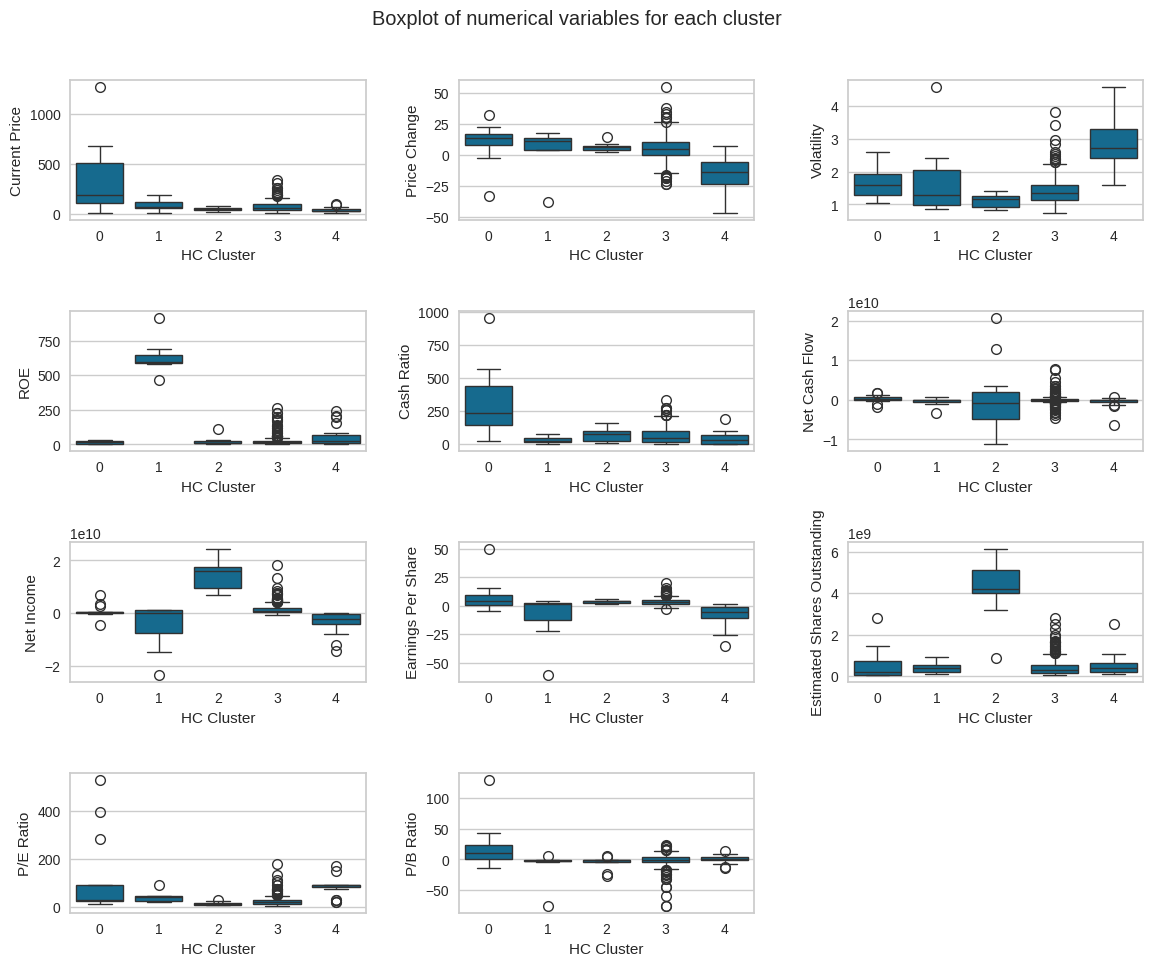

In [55]:
plt.figure(figsize=(12,10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x="HC Cluster", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='HC Cluster'>

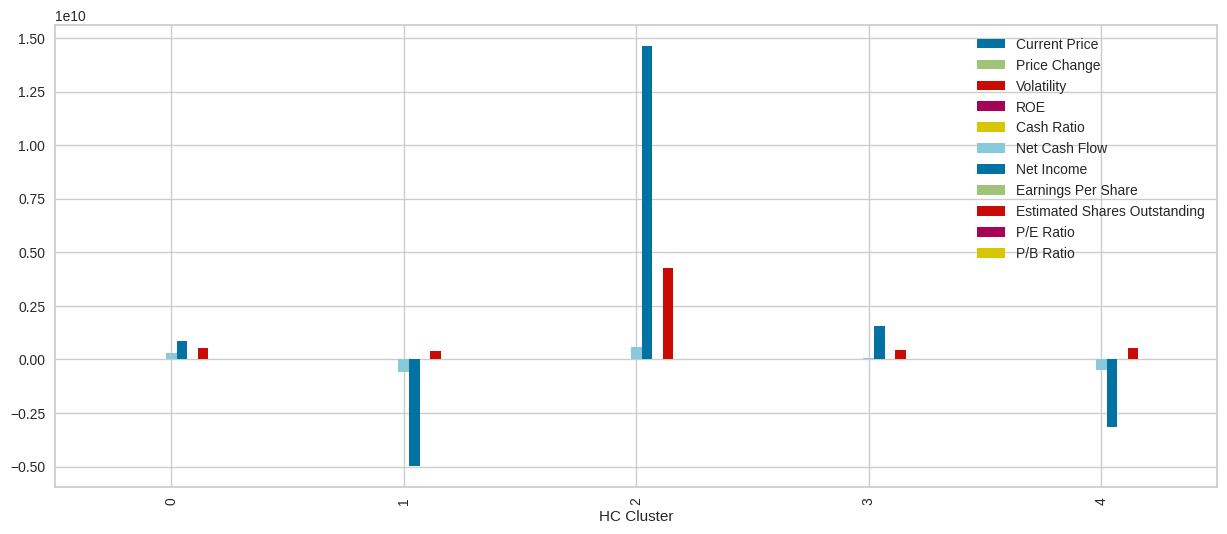

In [56]:
df1[num_cols].groupby(df1["HC Cluster"]).mean().plot.bar(figsize=(15, 6))

### Insights

- **Cluster 0**:
    - Has highest current price, largest price increase, largest cash ratio, earnings per share, P/E ratio, and P/B ratio.
    - Has the smallest ROE.
    - Has second largest net positive cash flow, net positive income, and estimated shares outstanding.

- **Cluster 1**
    - Has the largest ROE.
    - Has the second highest current price and volatility.
    - Has the largest net negative cash flow, negative income, negative earnings per share, and P/B ratio.

- **Cluster 2**
    - Has the largest net positive cash flow, positive net income, and estimated shares outstanding.
    - Has the second largest price increase and cash ratio.
    - Has the lowest volatility and P/E ratio.

- **Cluster 3**
    - Has the most data count in this cluster.
    - Has relatively high current price, price increase, ROE, and cash ratio.
    - The net cash flow and net income are positive, and P/B ratio is negative.

- **Cluster 4**
    - Has the largest volatility and lowest current price.
    - Has price decrease, negative net cash flow, negative net income, and negative earnings per share.
    - Has the second largest ROE and P/E ratio.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- Both K-means and Hierarchical clustering run very fast for execution in this project.
- Comparing the data variability in each assigned cluster between K-mean clustering and Hierarchical clustering methods, clusters determined from both algorithms tend to have one dominant cluster which contain the majority of the data count. Although the cluster number is larger from the K-mean clustering, the hierarchical clustering gives slightly more distinct clusters than the K-mean clustering, given the more distinct mean features in each assigned cluster.
- The dominant cluster (with the most data count) defined by the K-mean clustering (i.e., cluster 0) and hierarchical clustering (i.e., cluster 3) are overall comparable in terms of the mean data features. For example, the mean features are generally on the same magnitude and have same signs. Other than the dominant cluster, the rest of the defined clusters have quite different data features between the two algorithms.
- The K-mean clustering algorithm obtains 11 clusters and the Hierarchical clustering algorithm obtains 5 clusters.

## Actionable Insights and Recommendations

- Based on the Hierarchical clustering with 5 clusters using ward linkage and euclidean distance:
  - Companies in cluster 0 tend to have high current stock price, large stock price increase, large cash ratio, earnings per share, P/E ratio, and P/B ratio. They also have large net positive cash flow, net positive income, and estimated shares outstanding. Therefore, these companies could be good options to invest for a long term because of the healthy financial conditions.
  - Companies in cluster 2 are also potential good choices to invest. This is because of their relatively low current stock price and low P/E ratio, as well as the substantial positive net cash flow and income. There are potentials for these companies to grow further in the future. Thus their stock prices may largely increase in the future.
  - For companies in cluster 4, people are not encouraged to buy their stock. Their stock price has decreased a lot in the past, and the net income and net cash flow are still negative. Therefore, the financial conditions are not very healthy for these companies. The investment in these companies may be risky.
- Based on the K-mean clustering with k = 11:
  - Companies in cluster 7 and 9 tend to have high cash ratio and net cash flow. They also have relatively high P/E ratio, estimated shares outstanding, net income, P/B ratio, and stock price increase. Therefore, these companies tend to have healthy financial conditions and they are good choices to invest.
  - Companies in cluster 4 are also good choices to invest because they have relatively stable and healthy financial indicators. However, given the high current stock price, people may be encouraged to invest later if their stock price could drop slightly in the near future.
  - Companies in clusters 2 and 3 are not encouraged to invest in the near future due to the large negative net income and cash flow and the price drop in the past.
- By combining the clusters from both K-mean clustering and Hierarchical clustering, the overlapped companies in cluster 0 and cluster 2 from Hierarchical clustering and in cluster 7 and cluster 9 from K-mean clustering can be good choices for investment. On the other hand, the overlapped companies in cluster 4 from Hierarchical clustering and in clusters 2 and 3 from K-mean clustering should be avoided at this moment for investment.
- There are many companies in the cluster 3 from Hierarchical clustering algorithm and in the cluster 0 from K-mean clustering algorithm. More information about these companies may need to be collected to better cluster them into different groups.
- We should note that the current clustering results may not be perfect given the negative values of silhouette coefficients from K-mean clustering (k=11) and relative low cophenetic coefficient from Hierarchical clustering with ward linkage and euclidean distance. Other more complicated algorithms may better cluster the dataset.

In [57]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/Project 7/USL_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/Project 7/USL_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 5965002 bytes to /content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/Project 7/USL_Project_LearnerNotebook_FullCode.html
